# MASTER Script of py_recom2 [python3]

This is the MASTER script of **py_f2recom** !!!  
[One could say: "One script to rule them all!"]
<img src="lordoftherings-eyeofsauron.jpg">

 

### Table of Contents

* [1. Configuration](#CONFIGURATION)
    * [1.1 Mesh visualization](#MESH)
* [2. Physical fields](#PHYSICS)
    * [2.1 Maps](#PHYMAPS)
        * [2.1.1 Temperature](#TEMPMAPS)
            * [2.1.1.1 PHC3](#TEMPPHC3MAPS)
            * [2.1.1.2 WOA](#TEMPWOAMAPS)
        * [2.1.2 Salinity](#SAL)
            * [2.2.1.1 PHC3](#SALPHC3MAPS)
            * [2.2.1.2 WOA](#SALWOAMAPS)
        * [2.1.3 MLD](#MLD)
    * [2.2 T-S Profiles](#PHYPRO)
    * [2.3 T-S time-series](#PHYTS)
    
        
* [3. BGC tracers](#BGC)
    * [3.1 Oxygen](#OXY)
        * [3.1.1 Maps](#OXYMAPS)
        * [3.1.2 profiles](#OXYPRO)
        * [3.1.3 time-series](#OXYTS)
    * [3.2 Nutrients](#NUT)
        * [3.1.1 DIN](#DIN)
            * [3.1.1.1 Maps](#DINMAPS)
            * [3.1.1.2 time-series](#DINTS)
        * [3.1.2 DSi](#DSI)
            * [3.1.2.1 Maps](#DSIMAPS)
            * [3.1.2.2 time-series](#DSITS)
        * [3.1.3 DFe](#DFE)
            * [3.1.1.1 Maps](#DFEMAPS)
            * [3.1.3.2 time-series](#DFETS)
        * [3.1.4 profiles](#NUTPRO)
    * [3.3 Carbonate systen](#OXY)
        * [3.3.1 Maps](#CMAPS)
            * [3.3.1.1 DIC](#DIC)
            * [3.3.1.2 Alkalinity](#ALK)
            * [3.3.1.3 pCO2](#PCO2)
        * [3.3.2 time-series](#CTS)
            * [3.3.2.1 fCO2](#DIC)
            * [3.3.2.2 Alkalinity](#ALK)
            * [3.3.2.3 pCO2](#PCO2)
    * [3.4 Ocean Productivity & ecosystem](#PP)
        * [3.4.1 Maps](#PPMAPS)
            * [3.4.1.1 Glogal Chl a](#CHLMAP)
            * [3.4.1.2 Southern Ocean Chl a](#SCHMAP)
            * [3.4.1.3 NPP](#NPPMAP)
            * [3.4.1.3 Zooplankton biomass](#ZOOMAP)
        * [3.4.2 time-series](#PPTS)
            * [3.4.2.3 NPP](#NPPTS)
    * [3.5 Extras](#EXTRAS)
        * [3.5.1 Maps](#ECTRAMAPS)
            * [3.5.1.1 Intracellular C](#INTCMAP)
            * [3.5.1.2 Intracellular N](#INTNMAP)
            * [3.5.1.2 Intracellular Si](#INTSIMAP)

# Configuration

In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%autosave 5

# necessary modules -------------------------------------------------------------------------------------
import sys
import os
sys.path.append('/home/ollie/loziel/pyfesom2/')
sys.path.append('/home/ollie/loziel/pyfesom2/SkillMetrics')
sys.path.append('/home/ollie/loziel/pyfesom2/codes/py_f2recom_develop/GlobalAssessment/')
import skill_metrics as sm
import pyfesom2 as pf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cmocean as cmo
import matplotlib.colors as colors
import time
from datetime import date
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# own py_recom modules ----------------------------------------------------------------------
# convert again if you changed something!
if True:
#    !jupyter nbconvert --to=python *.ipynb
#    !jupyter nbconvert --to=python load_interp_WOA_python3.ipynb
    !jupyter nbconvert --to=python plot_Taylor_normalized.ipynb
#    !jupyter nbconvert --to=python plot_Chlorophyll_FESOM_python3.ipynb
    !jupyter nbconvert --to=python Py_f2recom_toolbox.ipynb
# from plot_Chlorophyll_FESOM_python3 import plot_Chl
# from F2R_sensitivity_toolbox import mygrid

Autosaving every 5 seconds
[NbConvertApp] Converting notebook plot_Taylor_normalized.ipynb to python
[NbConvertApp] Writing 9356 bytes to plot_Taylor_normalized.py
[NbConvertApp] Converting notebook Py_f2recom_toolbox.ipynb to python
[NbConvertApp] Writing 4396 bytes to Py_f2recom_toolbox.py


In [2]:
# After changing these parameters here, save the notebook and clear the output. 
# Then run this cell and the cells with the desired parameters.

# run specification -------------------------------------------------------------------------------------   
if True:
    runid      =  'fesom'
    simu_name = 'standard'
    #resultpath = '/work/ollie/loziel/model_output/fesom2.1_recom/B_spinup_riv_farc_TKEQ/'
    #resultpath = '/work/ollie/ogurses/output_f2r2/spinup_1800_1850/A'
    resultpath = '/work/ollie/loziel/model_output/fesom2.1_recom/B_spinup_riv'
    #resultpath = '/work/ollie/loziel/model_output/fesom2.1_recom/A_riv/
    #meshpath = '/work/ollie/loziel/mesh/fArc/'
    #meshpath = '/work/ollie/clidyn/FESOM2/meshes/farc/'
    meshpath = '/work/ollie/mozeisin/mesh/mesh_fesom2.0/core2_meanz'
    # period of analysis 
    first_year_maps = 1840
    first_year = 1800
    last_year  = 1850
    
years = np.arange(first_year,last_year+1,1)
years_last10 = np.arange(first_year_maps,last_year+1,1)

# specification of analysis ------------------------------------------------------------------------------------

layerwise = False
depths = (0,50,200,1000,2000) # If layerwise is True, you can define depths here, by defaut: (0,50,200,1000,2000,4000)
depth_limit = 50
mapproj = 'pc'
#Map projection. Options are Mercator (merc), Plate Carree (pc),
#North Polar Stereo (np), South Polar Stereo (sp),  Robinson (rob)
#Robinson projection is quite time consuming.

# export of analysis ------------------------------------------------------------------------------------
today = date.today().strftime("_%Y_%m_%d")

savepath = '/home/ollie/loziel/pyfesom2/outputs/'+simu_name
savefig = False
htmlname     =  simu_name+'_'+ today +'.html'
htmlpath = '/home/ollie/loziel/pyfesom2/outputs/'
verbose = False

if not os.path.exists('htmlpath'): # create folders if do not exist
    os.makedirs('htmlpath')
if not os.path.exists('savepath'):
    os.makedirs('savepath')
    
# initialization file specifications -----------------------------------------------------------

evalpath      = '/work/ollie/projects/MarESys/evaluation/'

ncfileAlk                = evalpath+'GLODAPv2.2016b.TAlk.nc'
ncfileDIC                = evalpath+'GLODAPv2.2016b.TCO2.nc'
ncfileDSi                = evalpath+'woa13_all_i00_01.nc'
ncfileDIN                = evalpath+'woa13_all_n00_01.nc'
ncfileDO2                = evalpath+'woa18_all_o00_01.nc'
ncfileDFe                = evalpath+'fe_pisces_opa_eq_init_3D.nc' 
ncfileNPPTotalGlobal     = evalpath+'fesom.initial.mesh.diag.nc'
ncfileCO2fluxTotalGlobal = evalpath+'fesom.initial.mesh.diag.nc'
ncfileTemp               = evalpath+'woa18_decav_t00_01.nc'
ncfileSal                = evalpath+'woa18_decav_s00_01.nc'
ncfilePHC3               = evalpath+'phc3.0_annual.nc'      
ncfilepCO2               = evalpath+'SOCATv6_tracks_gridded_monthly.nc'
ncfileMLD                = evalpath+'mld_DR003.nc'
matfileChlsurf           = evalpath+'climatology_annual_chl_1deg_OCCCI_2012_2015.mat'
txtfileCO2flux           = evalpath+'CO2_flux2015_Takahashietal2009_original.txt'
ncfileMaredat            = evalpath+'MarEDat20120716Diatoms.nc'
ncfileJohnson2013        = evalpath+'Johnson2013_MEAN_1x1_Chl_mg_m3.npy'
matfileNPPvgpn           = evalpath+'VGPN_CLIM.mat'
matfileNPPcpbm           = evalpath+'CBPM_CLIM.mat'
matfileMLD               = evalpath+'GlobalML_Climato_1970_2018.mat'

# just to check
if(verbose):
    print('Processing years {4} to {5}\n\nReading out of {0}\nStoring graphs to {1}\nStoring html to {2} as {3}'.format(
        resultpath, savepath, htmlpath, htmlname,years[0],years[-1]))

    print('\nLast ten years are \n{0}'.format(years_last10))
    
# mesh initialization -----------------------------------------------------------
mesh = pf.load_mesh(meshpath)

if False: # check mesh setup nodal and area
    print(mesh)
    print('with depth levels:')
    print(mesh.zlev)
    
    print('\n\nFESOM mesh.diag:')
    meshdiag=resultpath+'/'+runid+'.mesh.diag.nc'
    #!ncdump -h $meshdiag

    diag = pf.get_meshdiag(mesh,meshdiag=meshdiag, runid=runid)
    print(diag)
    print('depth of layers:')
    mesh_depths = diag['nz1'].values
    #print(mesh_depths)
    
    nod_area = diag.nod_area
    nod_area.load()
    #print(np.shape(nod_area[:,:]), type(nod_area))
    
if False:    
    # whole globe
    pf.plot(mesh,np.array(nod_area[0,:]),units='nodal area (km$^{2}$)')
    
    # plot nodal area and mesh structure together
    pf.tplot(mesh, np.array(nod_area[0,:]), ptype='tri', box=[-30, 30, 60, 82], mapproj='np',lw=0.5,units='nodal area (km$^{2}$)')
    pf.tplot(mesh, np.array(nod_area[0,:]), ptype='tri', box=[-30, 30, -30, 30], mapproj='merc',lw=0.5,units='nodal area (km$^{2}$)')
    

if(verbose):
    print(mesh_depths)
    print(diag)

/work/ollie/mozeisin/mesh/mesh_fesom2.0/core2_meanz/pickle_mesh_py3_fesom2
The usepickle == True)
The pickle file for FESOM2 exists.
The mesh will be loaded from /work/ollie/mozeisin/mesh/mesh_fesom2.0/core2_meanz/pickle_mesh_py3_fesom2


## 1.1 Mesh visualization<a class="anchor" id="MESH"></a>

[NbConvertApp] Converting notebook Py_f2recom_toolbox.ipynb to python
[NbConvertApp] Writing 4396 bytes to Py_f2recom_toolbox.py


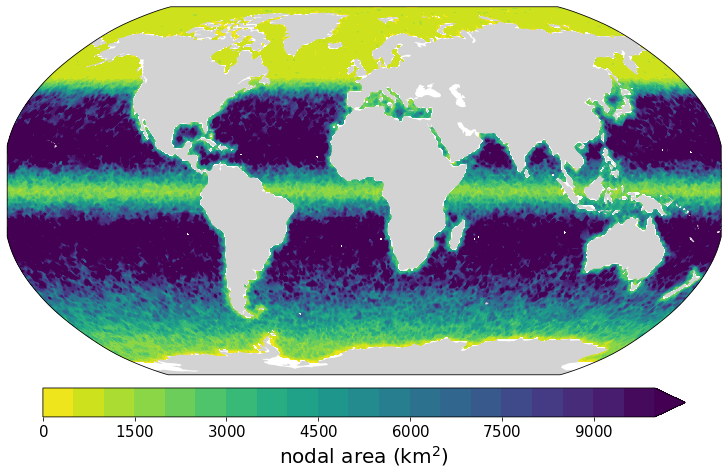

In [3]:
!jupyter nbconvert --to=python Py_f2recom_toolbox.ipynb
from Py_f2recom_toolbox import plot_mesh_area

plot_mesh_area(mesh, plot_globe = True, plot_poles=False, plot_zoom=False, levels=np.arange(0,10500,500))

[NbConvertApp] Converting notebook Py_f2recom_toolbox.ipynb to python
[NbConvertApp] Writing 4396 bytes to Py_f2recom_toolbox.py


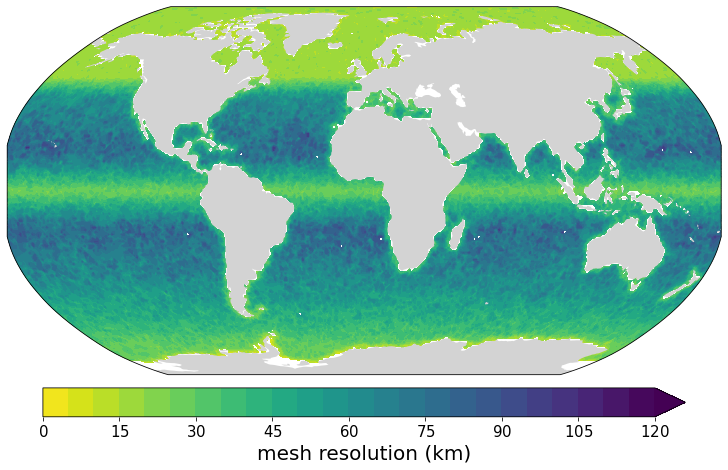

In [4]:
!jupyter nbconvert --to=python Py_f2recom_toolbox.ipynb
from Py_f2recom_toolbox import plot_mesh_resolution

plot_mesh_resolution(mesh, plot_globe = True, plot_poles=False, levels=np.arange(0,125,5))

# 2. Physical fields<a class="anchor" id="PHYSICS"></a>

## 2.1 Maps<a class="anchor" id="PHYMAPS"></a>

### 2.1.1 Temperature<a class="anchor" id="TEMPMAPS"></a>

#### PHC3<a class="anchor" id="TEMPPHC3MAPS"></a>

[NbConvertApp] Converting notebook TS_PHC3_Comparison_python3.ipynb to python
[NbConvertApp] Writing 49102 bytes to TS_PHC3_Comparison_python3.py
[NbConvertApp] Converting notebook load_interp_PHC_python3.ipynb to python
[NbConvertApp] Writing 6773 bytes to load_interp_PHC_python3.py
Depth is None, 3d field will be returned
***
Loading PHC file: /work/ollie/projects/MarESys/evaluation/phc3.0_annual.nc
***
***
Depth greater in FESOM (-6125.0) than in PHC (-5500.0)


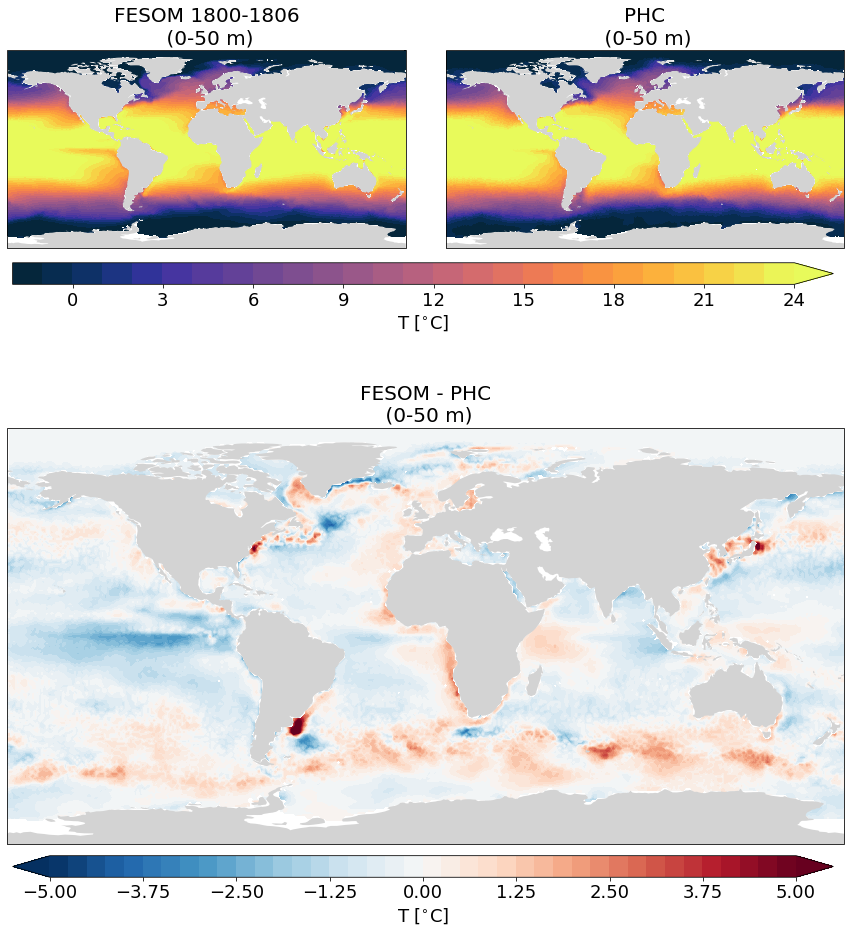

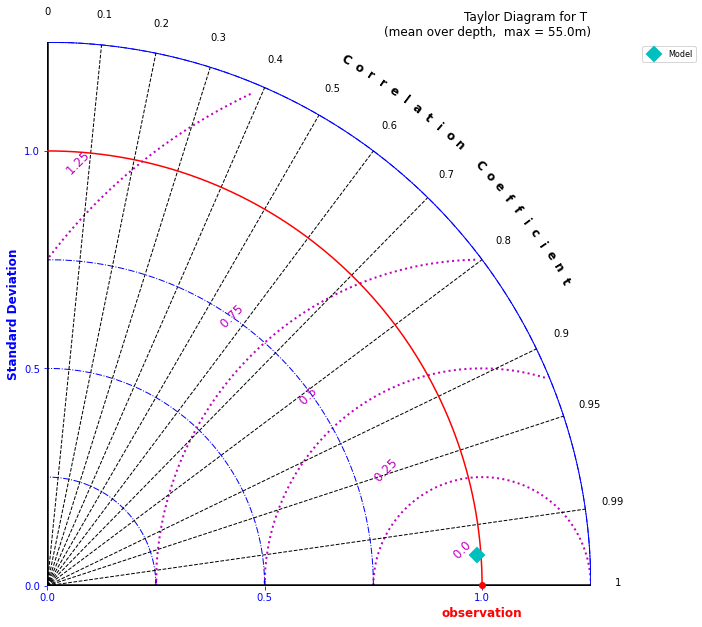

In [3]:
!jupyter nbconvert --to=python TS_PHC3_Comparison_python3.ipynb
!jupyter nbconvert --to=python load_interp_PHC_python3.ipynb

from TS_PHC3_Comparison_python3 import PHC3tempcomp
PHC3tempcomp(runid,resultpath,savepath,mesh,ncfilePHC3,first_year_maps,last_year,mapproj=mapproj,
                layerwise=layerwise,depth_array=depths,savefig=savefig, 
                cmap = cmo.cm.thermal,verbose=verbose,depth_limit=depth_limit)

# This routines intorpolate climatology on FESOM grid. 
# If you want to compare by interpolating FESOM on the climatoligical regular grid
# use the companion routine called 'PHC3tempcomp_regulargrid'
# Note that it does not allow for Taylor Diagram yet.

#### WOA<a class="anchor" id="TEMPWOAMAPS"></a>

[NbConvertApp] Converting notebook Temp_WOA_Comparison_python3.ipynb to python
[NbConvertApp] Writing 16348 bytes to Temp_WOA_Comparison_python3.py
[NbConvertApp] Converting notebook load_interp_WOA_python3.ipynb to python
[NbConvertApp] Writing 6782 bytes to load_interp_WOA_python3.py
Depth is None, 3d field will be returned
***
Loading WOA file: /work/ollie/projects/MarESys/evaluation/woa18_decav_t00_01.nc
***
***
Depth greater in FESOM (-6125.0) than in WOA (-5500.0)


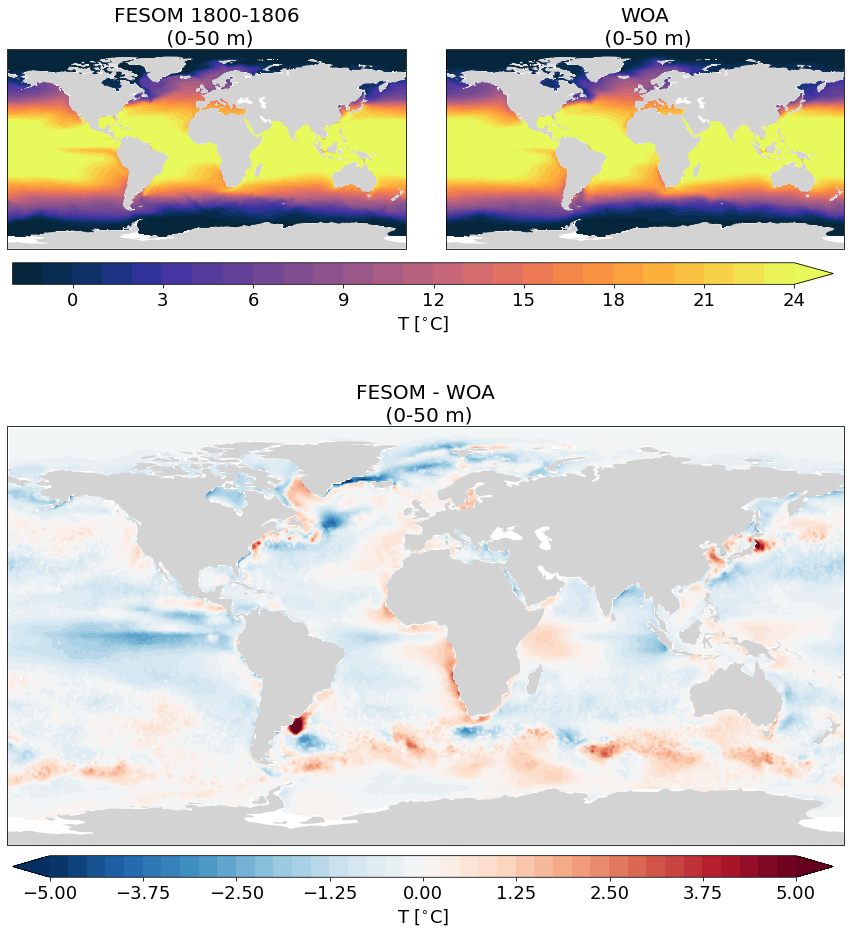

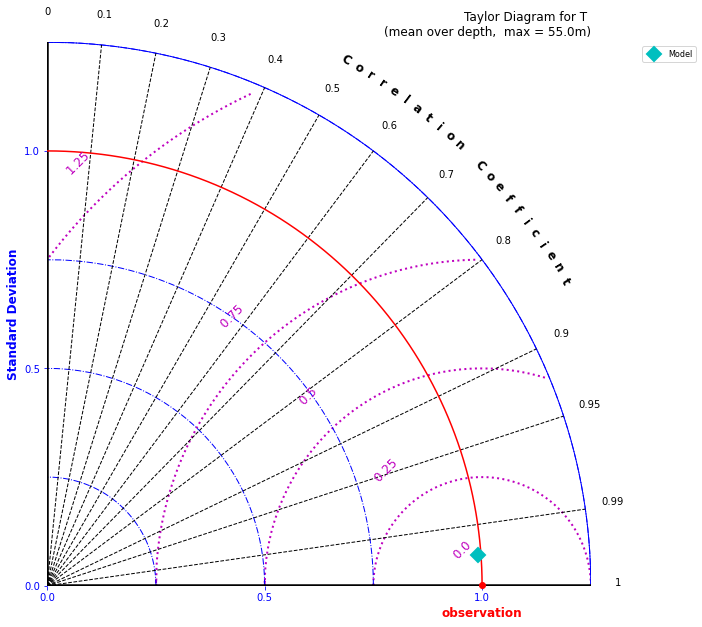

In [4]:
!jupyter nbconvert --to=python Temp_WOA_Comparison_python3.ipynb
!jupyter nbconvert --to=python load_interp_WOA_python3.ipynb

from Temp_WOA_Comparison_python3 import TEMPcomp
TEMPcomp(runid,resultpath,savepath,mesh,ncfileTemp,first_year_maps,last_year,mapproj=mapproj,
                layerwise=layerwise,depth_array=depths,savefig=savefig, 
                cmap = cmo.cm.thermal,verbose=verbose,depth_limit=depth_limit)

### 2.1.2 Salinity<a class="anchor" id="SAL"></a>

#### PHC3<a class="anchor" id="SALPHC3MAPS"></a>

[NbConvertApp] Converting notebook TS_PHC3_Comparison_python3.ipynb to python
[NbConvertApp] Writing 49102 bytes to TS_PHC3_Comparison_python3.py
[NbConvertApp] Converting notebook load_interp_PHC_python3.ipynb to python
[NbConvertApp] Writing 6773 bytes to load_interp_PHC_python3.py
Depth is None, 3d field will be returned
***
Loading PHC file: /work/ollie/projects/MarESys/evaluation/phc3.0_annual.nc
***
***
Depth greater in FESOM (-6125.0) than in PHC (-5500.0)


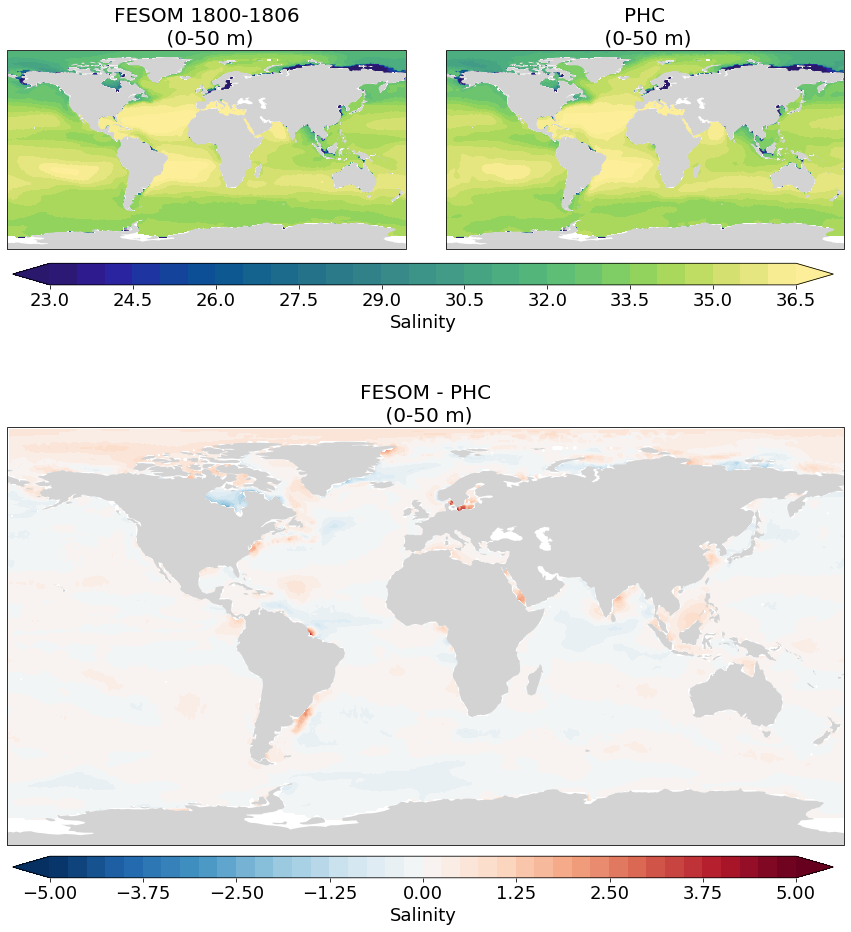

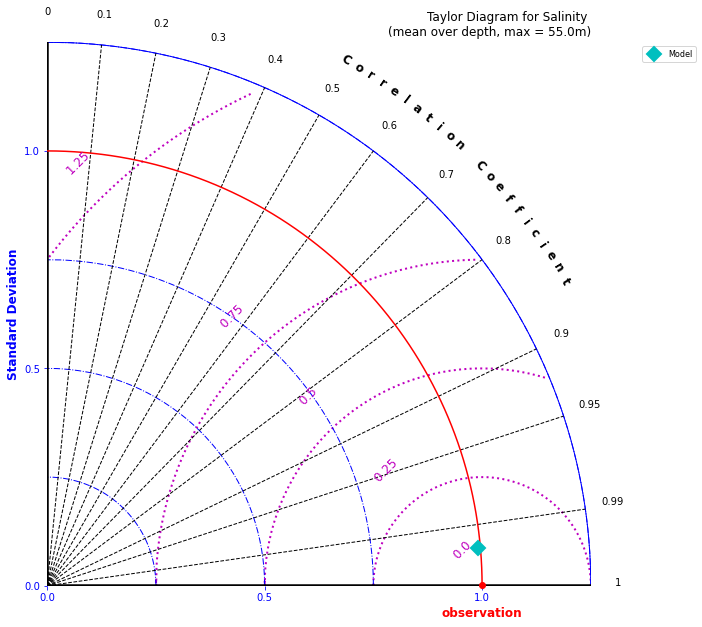

In [5]:
!jupyter nbconvert --to=python TS_PHC3_Comparison_python3.ipynb
!jupyter nbconvert --to=python load_interp_PHC_python3.ipynb

from TS_PHC3_Comparison_python3 import PHC3salcomp
PHC3salcomp(runid,resultpath,savepath,mesh,ncfilePHC3,first_year_maps,last_year,mapproj=mapproj,
                layerwise=layerwise,depth_array=depths,savefig=savefig, 
                cmap = cmo.cm.haline,verbose=verbose,depth_limit=depth_limit)

# This routines intorpolate climatology on FESOM grid. 
# If you want to compare by interpolating FESOM on the climatoligical regular grid
# use the companion routine called 'PHC3salcomp_regulargrid'
# Note that it does not allow for Taylor Diagram yet.

#### WOA<a class="anchor" id="SALWOAMAPS"></a>

[NbConvertApp] Converting notebook Sal_WOA_Comparison_python3.ipynb to python
[NbConvertApp] Writing 16963 bytes to Sal_WOA_Comparison_python3.py
Depth is None, 3d field will be returned
***
Loading WOA file: /work/ollie/projects/MarESys/evaluation/woa18_decav_s00_01.nc
***
***
Depth greater in FESOM (-6125.0) than in WOA (-5500.0)


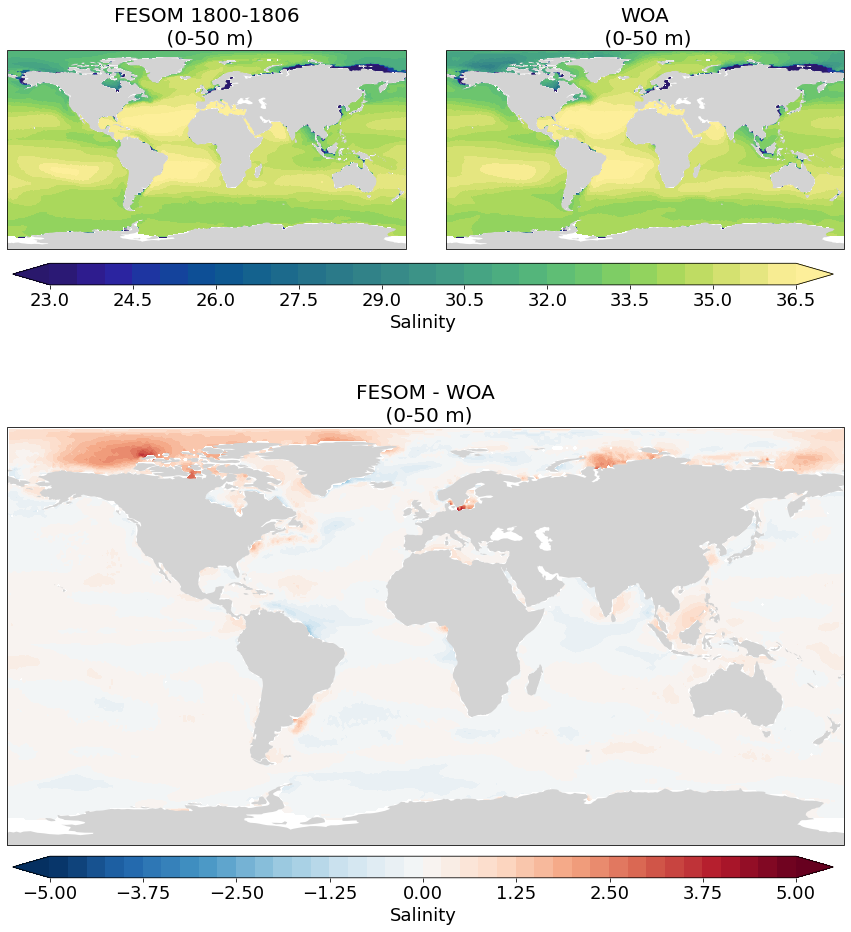

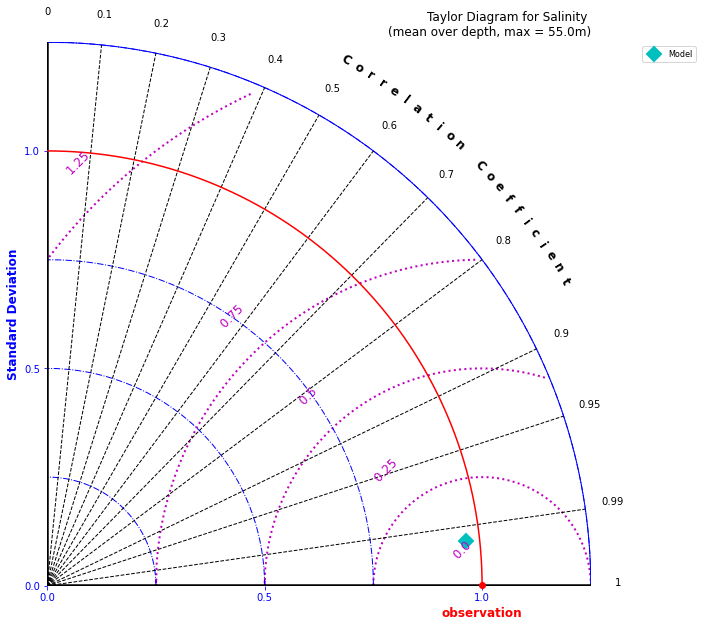

In [6]:
!jupyter nbconvert --to=python Sal_WOA_Comparison_python3.ipynb
from Sal_WOA_Comparison_python3 import SALcomp

# problem: sometimes FESOM salt output (e.g Ozgur's testrun 3) includes all gridpoints in deeper depth 
# and not only ocean points!
# figures using Robinson projections plot false results
# solution: use only Plate Carree

SALcomp(runid,resultpath,savepath,mesh,ncfileSal,first_year_maps,last_year,mapproj=mapproj,
               layerwise=layerwise,depth_array=depths,savefig=savefig,
               cmap = cmo.cm.haline,verbose=verbose,depth_limit=depth_limit)

### 2.1.3 MLD<a class="anchor" id="MLD"></a>

[NbConvertApp] Converting notebook MLDspatial_python3.ipynb to python
[NbConvertApp] Writing 5830 bytes to MLDspatial_python3.py


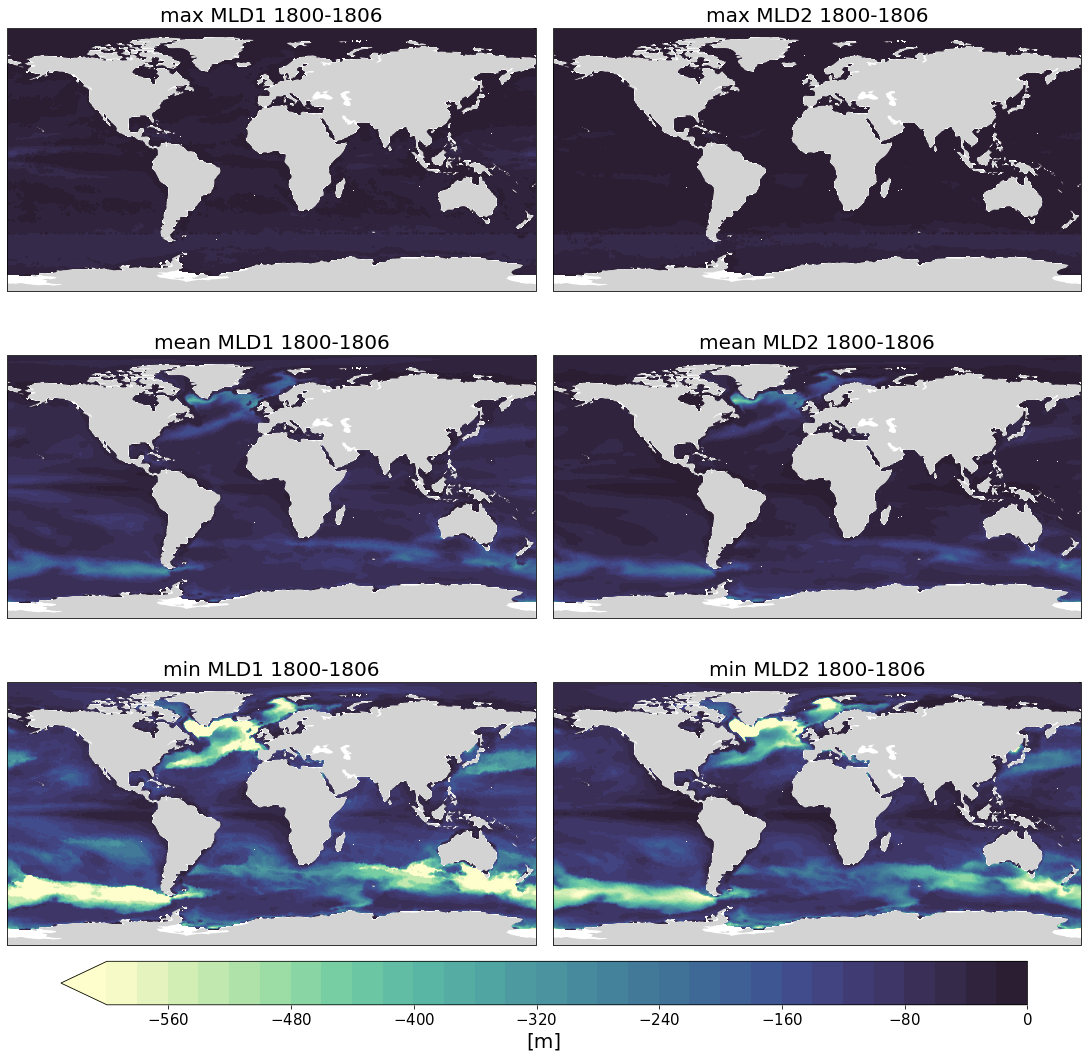

In [8]:
!jupyter nbconvert --to=python MLDspatial_python3.ipynb
from MLDspatial_python3 import MLDspatial_global
# see script FESOM documentation & MLD script header for more information about MLD1 vs. MLD2
# In FESOM2-RECOM2, MLD2 is set to be density threshold of 0.03 kg/m3 like in de Boyer et al. (2004)
MLDspatial_global(runid,resultpath,savepath,mesh,first_year_maps,last_year,
                         mapproj=mapproj,savefig=savefig,cmap=cmo.cm.deep)

[NbConvertApp] Converting notebook load_interp_MLD_python3.ipynb to python
[NbConvertApp] Writing 4462 bytes to load_interp_MLD_python3.py
[NbConvertApp] Converting notebook MLD_Comparison_python3.ipynb to python
[NbConvertApp] Writing 11753 bytes to MLD_Comparison_python3.py
***
Loading MLD file: /work/ollie/projects/MarESys/evaluation/GlobalML_Climato_1970_2018.mat
***


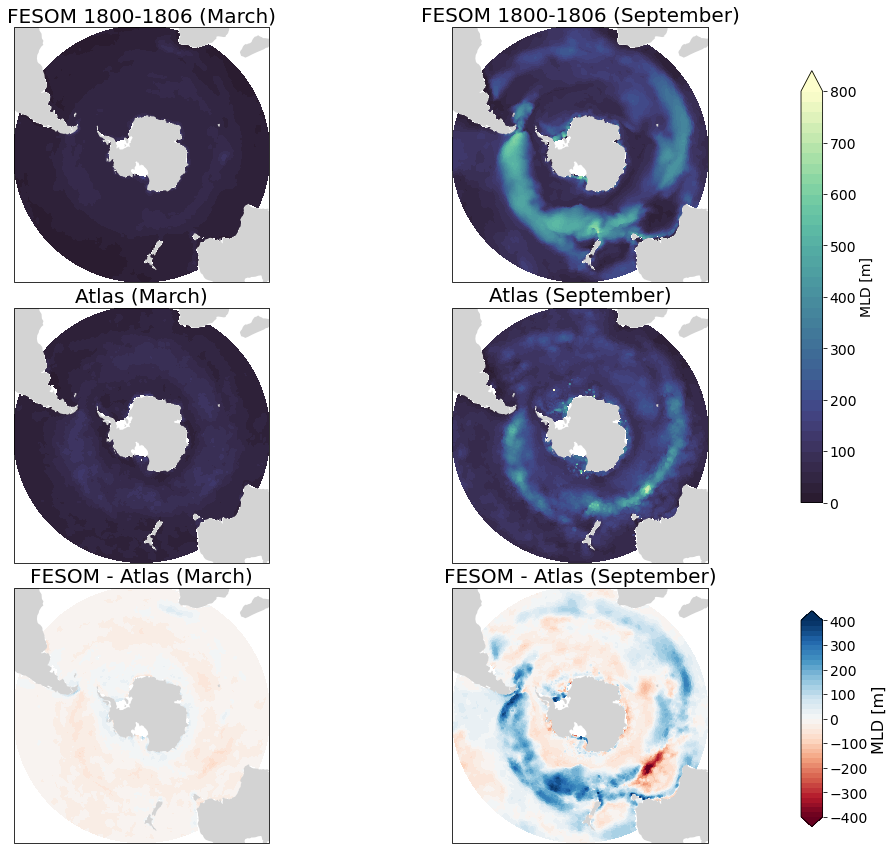

In [9]:
!jupyter nbconvert --to=python load_interp_MLD_python3.ipynb
!jupyter nbconvert --to=python MLD_Comparison_python3.ipynb
from MLD_Comparison_python3 import MLD_comp

MLD_comp(runid,resultpath,savepath,mesh,matfileMLD,first_year_maps,last_year,
                 mapproj='sp',savefig=False, verbose=False, output=False, 
                            plotting=True, Taylor=True,cmap = cmo.cm.deep_r)

## 2.2 Profiles<a class="anchor" id="PHYPRO"></a>

[NbConvertApp] Converting notebook TS_profiles_python3.ipynb to python
[NbConvertApp] Writing 14462 bytes to TS_profiles_python3.py
***
Loading WOA file: /work/ollie/projects/MarESys/evaluation/woa18_decav_s00_01.nc
***
***
Depth greater in FESOM (-6125.0) than in WOA (-5500.0)
***
Loading WOA file: /work/ollie/projects/MarESys/evaluation/woa18_decav_t00_01.nc
***
***
Depth greater in FESOM (-6125.0) than in WOA (-5500.0)


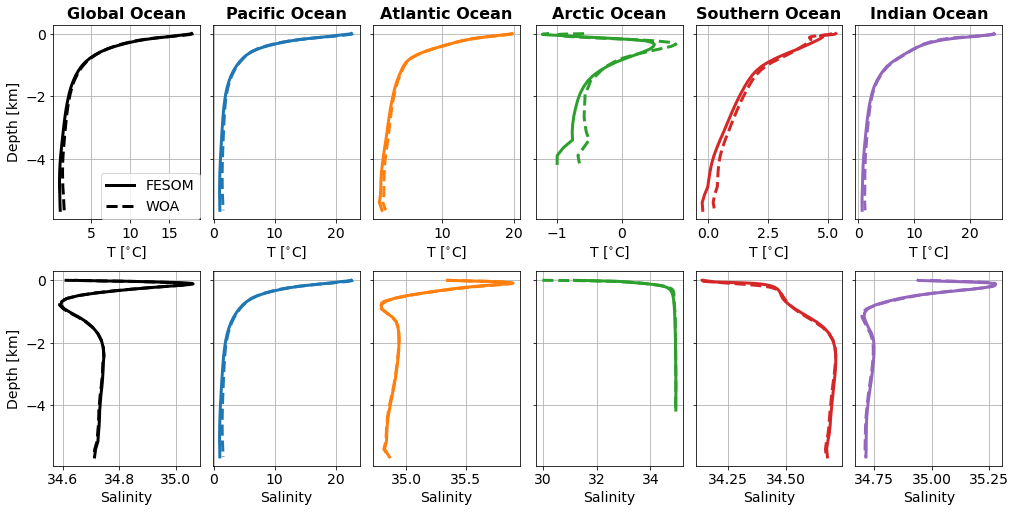

In [11]:
!jupyter nbconvert --to=python TS_profiles_python3.ipynb
from TS_profiles_python3 import TS_profile

TS_profile(runid,resultpath,savepath,mesh,ncfileTemp,ncfileSal,first_year_maps,last_year,
                 savefig=savefig, regional=True)

## 2.3 time series

# 3. BGC tracers<a class="anchor" id="BGC"></a>

## 3.1 Maps

### 3.1.1 Oxygen

[NbConvertApp] Converting notebook DO2_WOA_Comparison_python3.ipynb to python
[NbConvertApp] Writing 16289 bytes to DO2_WOA_Comparison_python3.py
***
Loading WOA file: /work/ollie/projects/MarESys/evaluation/woa18_all_o00_01.nc
***
***
Depth greater in FESOM (-6125.0) than in WOA (-5500.0)


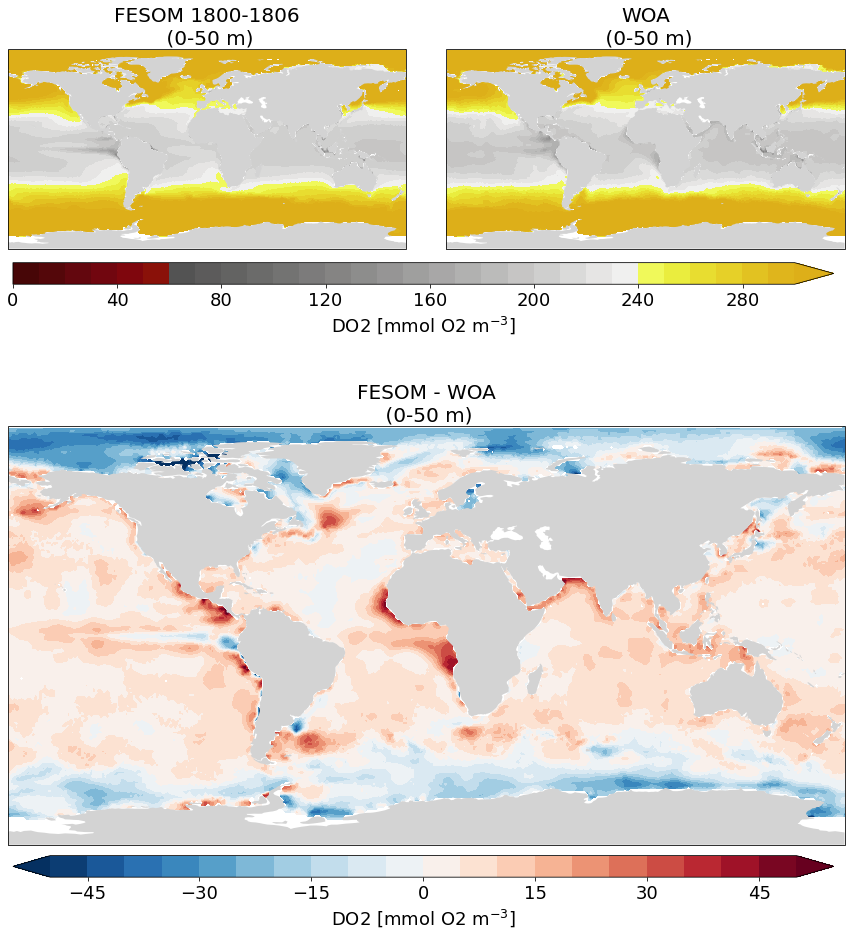

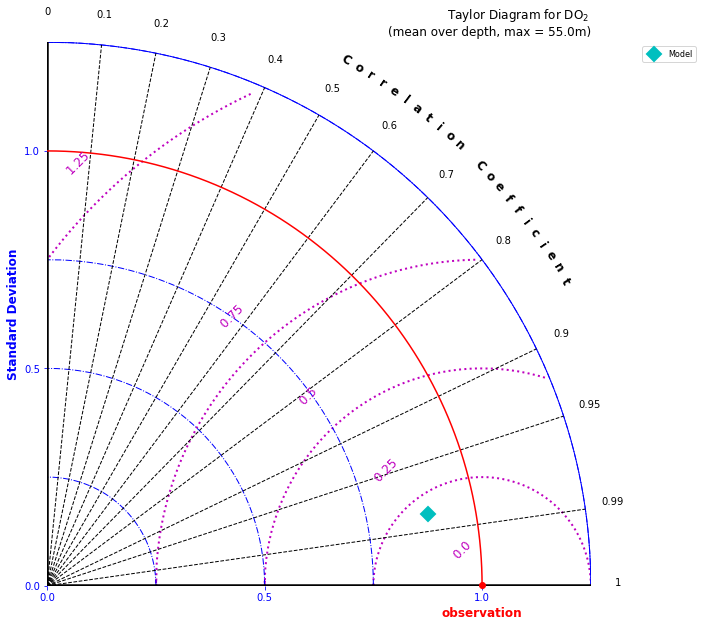

In [13]:
!jupyter nbconvert --to=python DO2_WOA_Comparison_python3.ipynb
from DO2_WOA_Comparison_python3 import DO2comp

DO2comp(runid,resultpath,savepath,mesh,ncfileDO2,first_year_maps,last_year,
               mapproj=mapproj,layerwise=layerwise,savefig=savefig,
               cmap=cmo.cm.oxy,verbose=verbose,depth_limit=depth_limit)

### 3.1.2 DIN

[NbConvertApp] Converting notebook DIN_WOA_Comparison_python3.ipynb to python
[NbConvertApp] Writing 16939 bytes to DIN_WOA_Comparison_python3.py
***
Loading WOA file: /work/ollie/projects/MarESys/evaluation/woa13_all_n00_01.nc
***
***
Depth greater in FESOM (-6125.0) than in WOA (-5500.0)


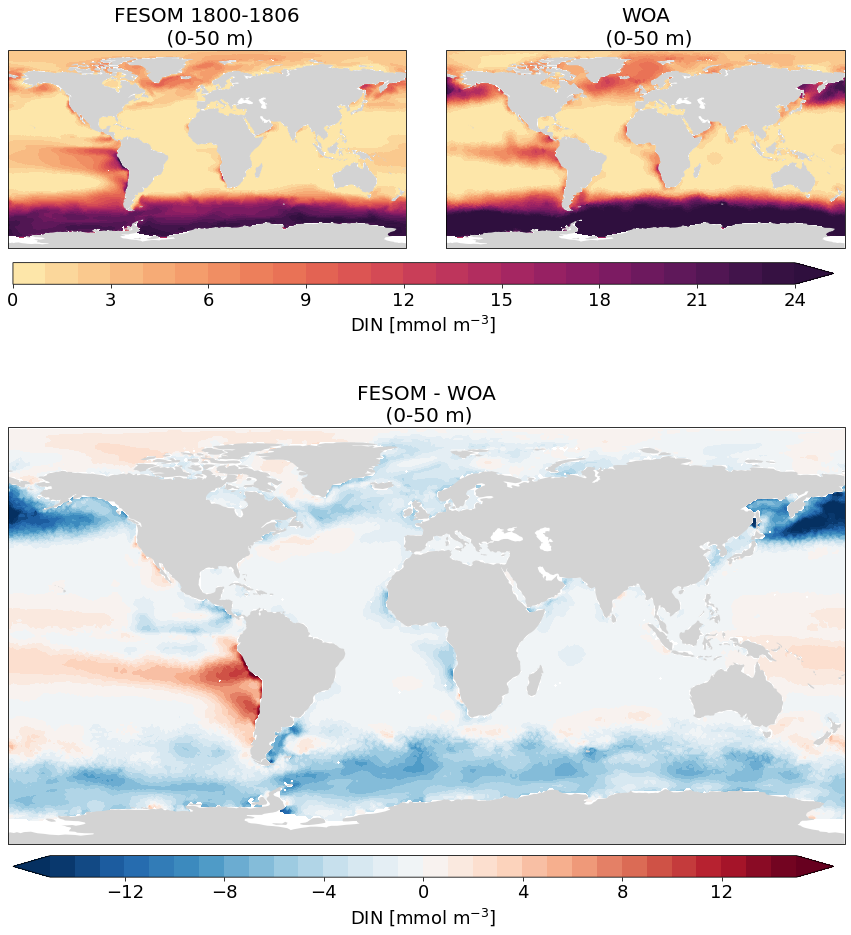


Original Taylor stats:
SDEV pred: 6.93064, ref: 8.67376
CRMS pred: 3.62459, ref: 0.00000
CORRCOEF: 0.91600

Normalized Taylor stats:
SDEV pred: 0.79904, ref: 1.00000
CRMS pred: 0.41788, ref: 0.00000
CORRCOEF: 0.91600


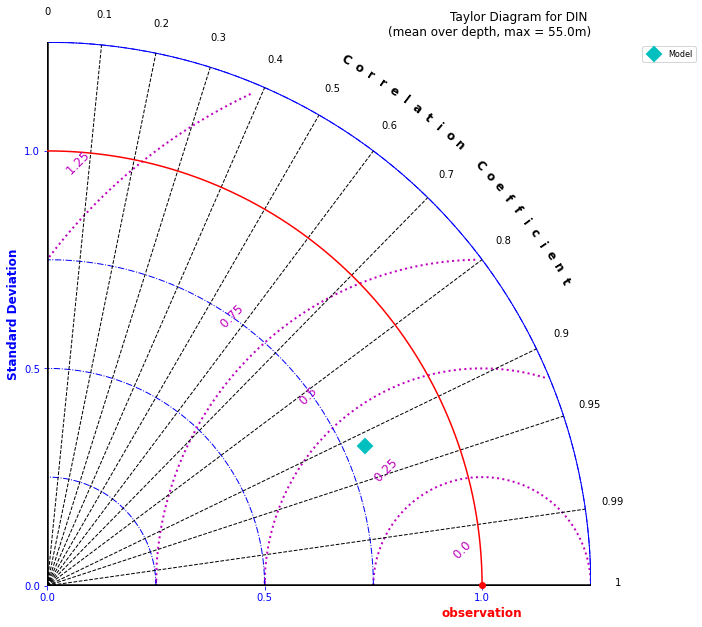

In [15]:
!jupyter nbconvert --to=python DIN_WOA_Comparison_python3.ipynb

from DIN_WOA_Comparison_python3 import DINcomp
DINcomp(runid,resultpath,savepath,mesh,ncfileDIN,first_year_maps,last_year,
               mapproj=mapproj,savefig=savefig,layerwise=layerwise,
               cmap=cmo.cm.matter,verbose=verbose,depth_limit=depth_limit)

[NbConvertApp] Converting notebook DIN_timeseries_python3.ipynb to python
[NbConvertApp] Writing 16312 bytes to DIN_timeseries_python3.py
calculating time series...
calculation done.
plotting...
plotting done.


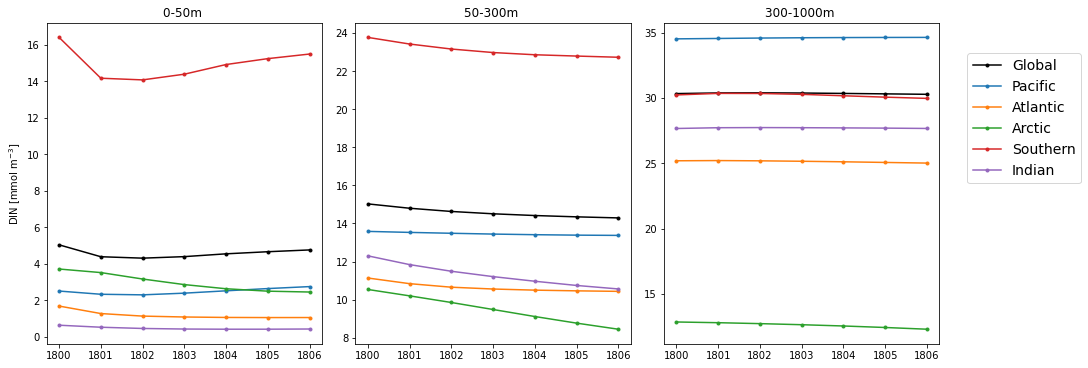

In [16]:
!jupyter nbconvert --to=python DIN_timeseries_python3.ipynb
from DIN_timeseries_python3 import DIN_timeseries

DIN_timeseries(runid,resultpath,savepath,mesh,first_year_maps,last_year,savefig=savefig,regional='all')

### 3.1.3 DSi

[NbConvertApp] Converting notebook DSi_WOA_Comparison_python3.ipynb to python
[NbConvertApp] Writing 16379 bytes to DSi_WOA_Comparison_python3.py
***
Loading WOA file: /work/ollie/projects/MarESys/evaluation/woa13_all_i00_01.nc
***
***
Depth greater in FESOM (-6125.0) than in WOA (-5500.0)


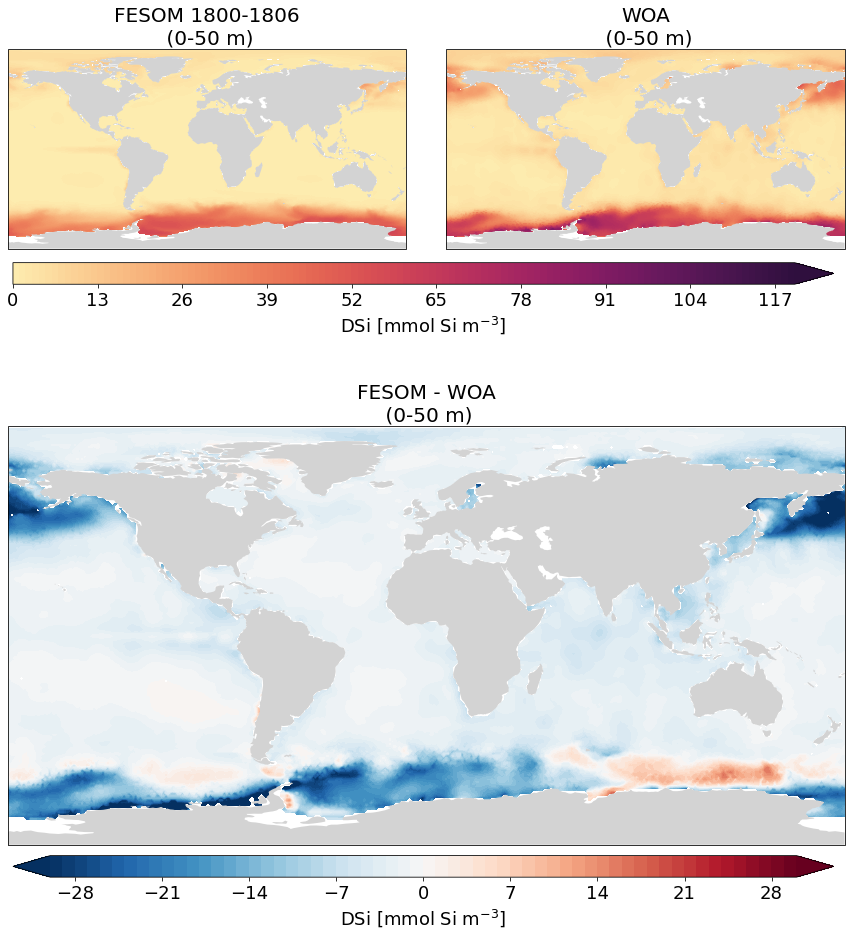


Original Taylor stats:
SDEV pred: 12.64922, ref: 17.78448
CRMS pred: 8.21805, ref: 0.00000
CORRCOEF: 0.90850

Normalized Taylor stats:
SDEV pred: 0.71125, ref: 1.00000
CRMS pred: 0.46209, ref: 0.00000
CORRCOEF: 0.90850


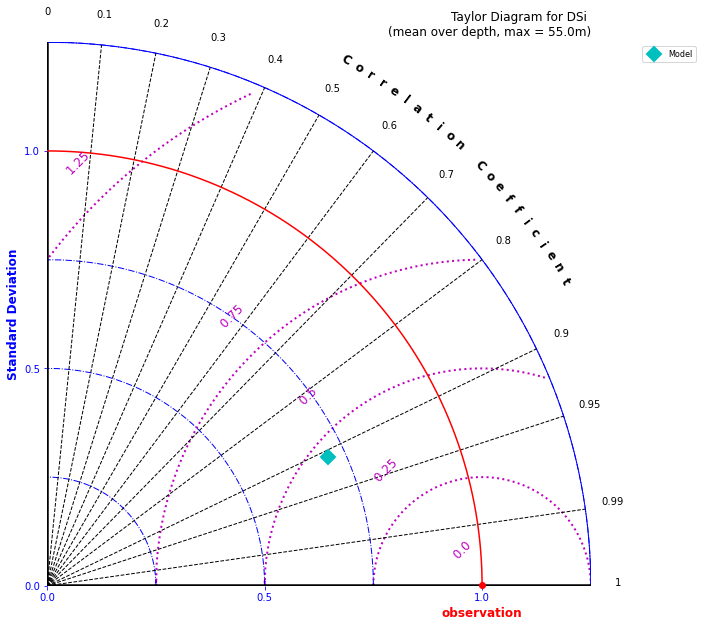

In [17]:
!jupyter nbconvert --to=python DSi_WOA_Comparison_python3.ipynb
from DSi_WOA_Comparison_python3 import DSicomp

DSicomp(runid,resultpath,savepath,mesh,ncfileDSi,first_year_maps,last_year,
        layerwise=layerwise,mapproj=mapproj,savefig=savefig,cmap=cmo.cm.matter,
           verbose=verbose,depth_limit=depth_limit)

[NbConvertApp] Converting notebook DSi_timeseries_python3.ipynb to python
[NbConvertApp] Writing 16292 bytes to DSi_timeseries_python3.py
calculating time series...
calculation done.
plotting...
plotting done.


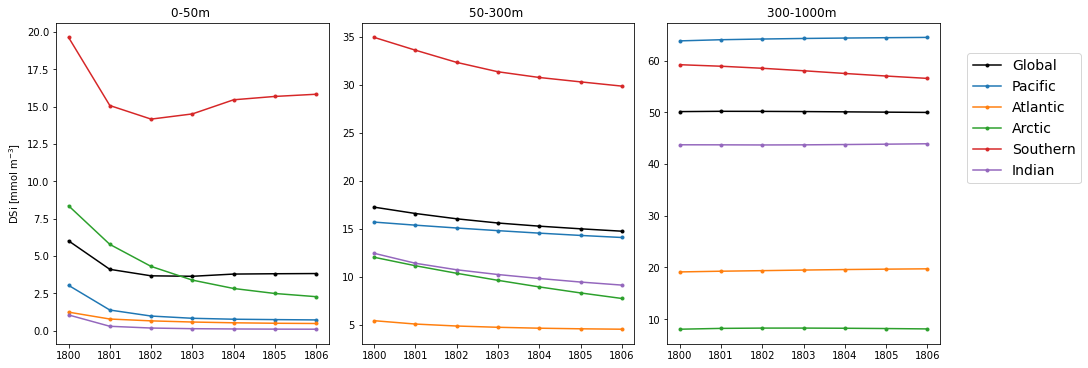

In [18]:
!jupyter nbconvert --to=python DSi_timeseries_python3.ipynb
from DSi_timeseries_python3 import DSi_timeseries

DSi_timeseries(runid,resultpath,savepath,mesh,first_year_maps,last_year,savefig=savefig,regional='all')

### 3.1.4 DFe

[NbConvertApp] Converting notebook DFe_PISCES_Comparison_python3.ipynb to python
[NbConvertApp] Writing 17181 bytes to DFe_PISCES_Comparison_python3.py
[NbConvertApp] Converting notebook load_interp_PISCES_python3.ipynb to python
[NbConvertApp] Writing 6734 bytes to load_interp_PISCES_python3.py
***
Depth greater in FESOM (-6125.0) than in PISCES (-5500.0)
DFe as mean over depth 
with max layer depth = 107.5 
(level depth = 100.0m, mesh index 11)

FESOM min = 0.0010, max = 6.1747
PISCES min = 0.0060, max = 3.0507


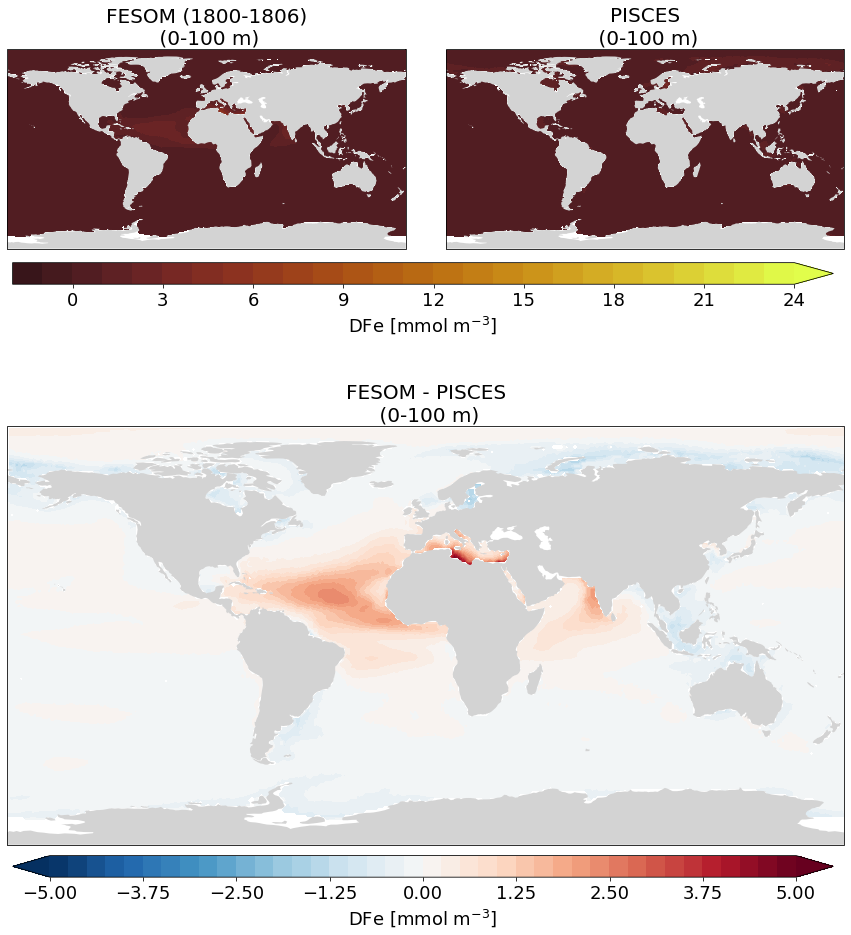


Original Taylor stats:
SDEV pred: 0.41430, ref: 0.37751
CRMS pred: 0.42515, ref: 0.00000
CORRCOEF: 0.42649

Normalized Taylor stats:
SDEV pred: 1.09744, ref: 1.00000
CRMS pred: 1.12618, ref: 0.00000
CORRCOEF: 0.42649
Adjust axis max to 1.5


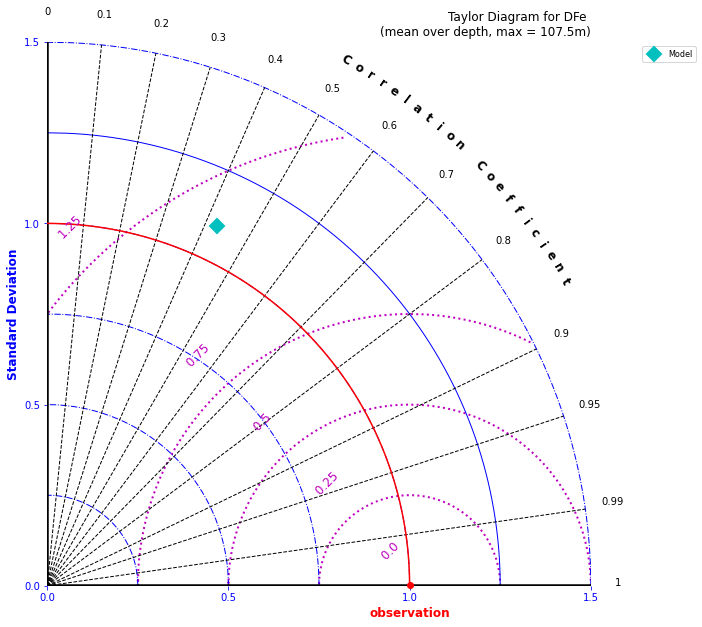

In [20]:
!jupyter nbconvert --to=python DFe_PISCES_Comparison_python3.ipynb
!jupyter nbconvert --to=python load_interp_PISCES_python3.ipynb
from DFe_PISCES_Comparison_python3 import DFecomp
from load_interp_PISCES_python3 import PISCESdata

DFecomp(runid,resultpath,savepath,mesh,ncfileDFe,first_year_maps,last_year,mapproj=mapproj,savefig=savefig,
                 layerwise=layerwise,cmap = cmo.cm.solar)

[NbConvertApp] Converting notebook DFe_timeseries_python3.ipynb to python
[NbConvertApp] Writing 16312 bytes to DFe_timeseries_python3.py
calculating time series...
calculation done.
plotting...
plotting done.


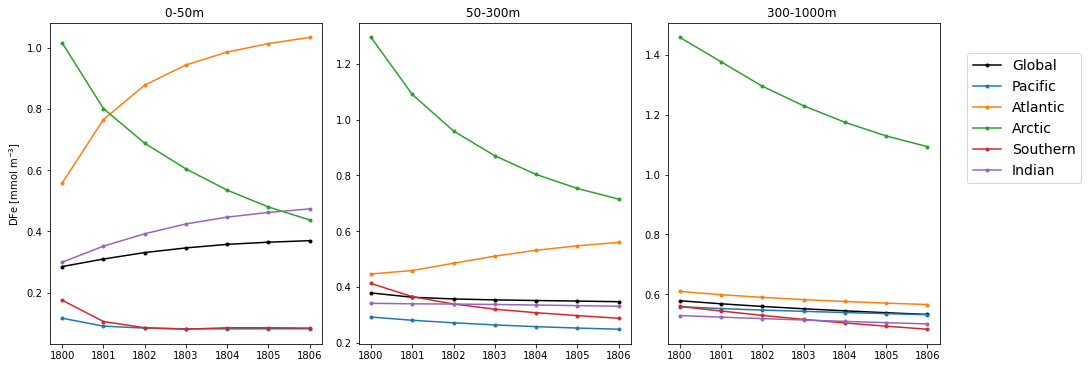

In [21]:
!jupyter nbconvert --to=python DFe_timeseries_python3.ipynb
from DFe_timeseries_python3 import DFe_timeseries

DFe_timeseries(runid,resultpath,savepath,mesh,first_year_maps,last_year,savefig=savefig,regional='all')

## 3.2 Profiles

[NbConvertApp] Converting notebook DO2_profiles_python3.ipynb to python
[NbConvertApp] Writing 8607 bytes to DO2_profiles_python3.py
***
Loading WOA file: /work/ollie/projects/MarESys/evaluation/woa18_all_o00_01.nc
***
***
Depth greater in FESOM (-6125.0) than in WOA (-5500.0)


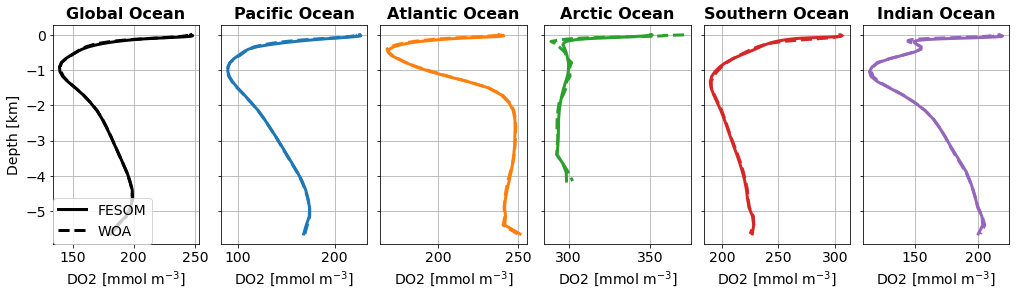

In [3]:
!jupyter nbconvert --to=python DO2_profiles_python3.ipynb
from DO2_profiles_python3 import DO2_profile

DO2_profile(runid,resultpath,savepath,mesh,ncfileDO2,first_year_maps,last_year,
                 savefig=savefig, regional=True)

[NbConvertApp] Converting notebook Nutrients_profiles_python3.ipynb to python
[NbConvertApp] Writing 20197 bytes to Nutrients_profiles_python3.py
***
Loading WOA file: /work/ollie/projects/MarESys/evaluation/woa13_all_n00_01.nc
***
***
Depth greater in FESOM (-6125.0) than in WOA (-5500.0)
***
Loading WOA file: /work/ollie/projects/MarESys/evaluation/woa13_all_i00_01.nc
***
***
Depth greater in FESOM (-6125.0) than in WOA (-5500.0)
***
Depth greater in FESOM (-6125.0) than in PISCES (-5500.0)


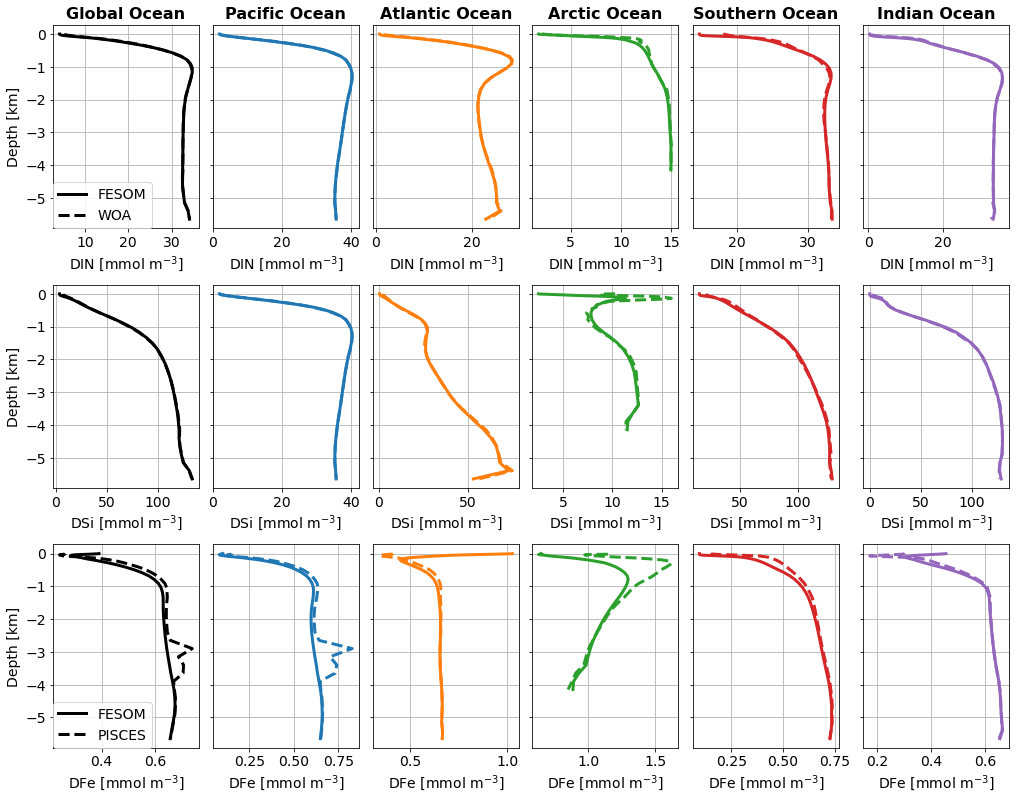

In [3]:
!jupyter nbconvert --to=python Nutrients_profiles_python3.ipynb
from Nutrients_profiles_python3 import Nut_profile

Nut_profile(runid,resultpath,savepath,mesh,ncfileDSi,ncfileDIN,ncfileDFe,first_year_maps,last_year,
                 savefig=savefig, regional=True)

# # Depreciated version
#
# !jupyter nbconvert --to=python Nutrients_depth_python3.ipynb
# from Nutrients_depth_python3 import Nut_depth

# test = Nut_depth(runid,resultpath,savepath,meshpath,obspath,last_year-10,last_year,mapproj=mapproj,
#                  latminmax=[-90,90],savefig=savefig)

# Carbonate system

## Maps

[NbConvertApp] Converting notebook DIC_Glodap_Comparison_python3.ipynb to python
[NbConvertApp] Writing 15931 bytes to DIC_Glodap_Comparison_python3.py
[NbConvertApp] Converting notebook load_interp_GLODAP_python3.ipynb to python
[NbConvertApp] Writing 7314 bytes to load_interp_GLODAP_python3.py
***
Loading GLODAP file: /work/ollie/projects/MarESys/evaluation/GLODAPv2.2016b.TCO2.nc
***
***
Depth greater in FESOM (-6125.0) than in GLODAP (-5500.0)
Please consider choosing max depth level 43 with max depth at -5275.0!
***


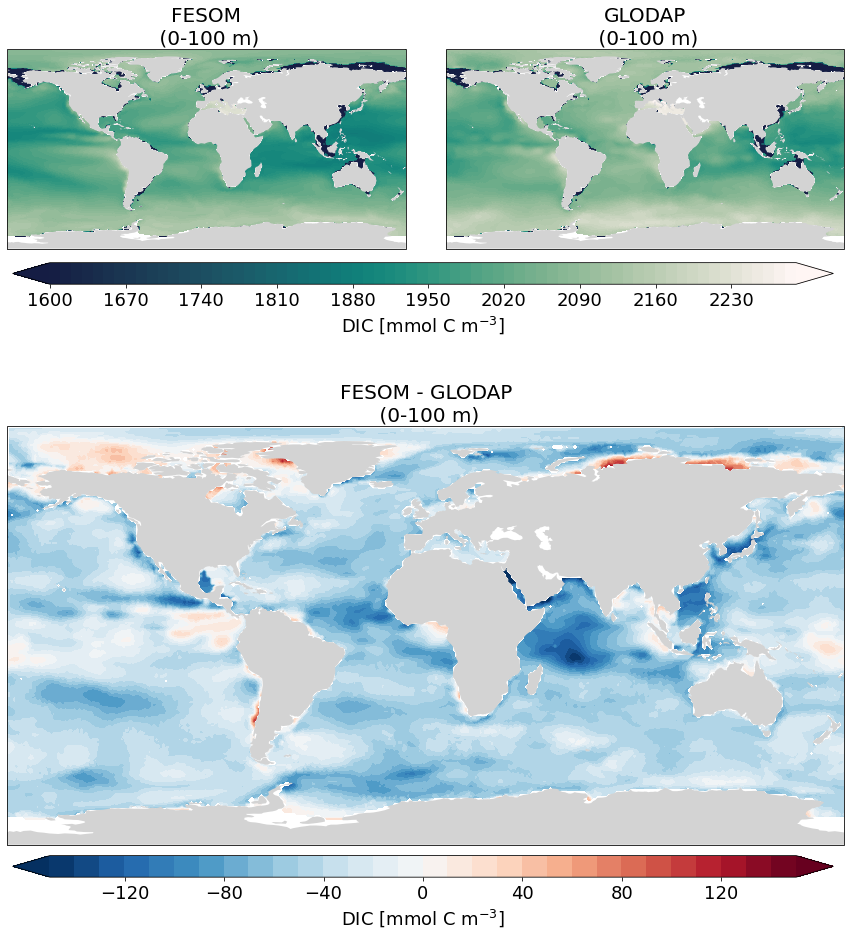


Original Taylor stats:
SDEV pred: 384.55145, ref: 396.14704
CRMS pred: 31.56486, ref: 0.00000
CORRCOEF: 0.99717

Normalized Taylor stats:
SDEV pred: 0.97073, ref: 1.00000
CRMS pred: 0.07968, ref: 0.00000
CORRCOEF: 0.99717


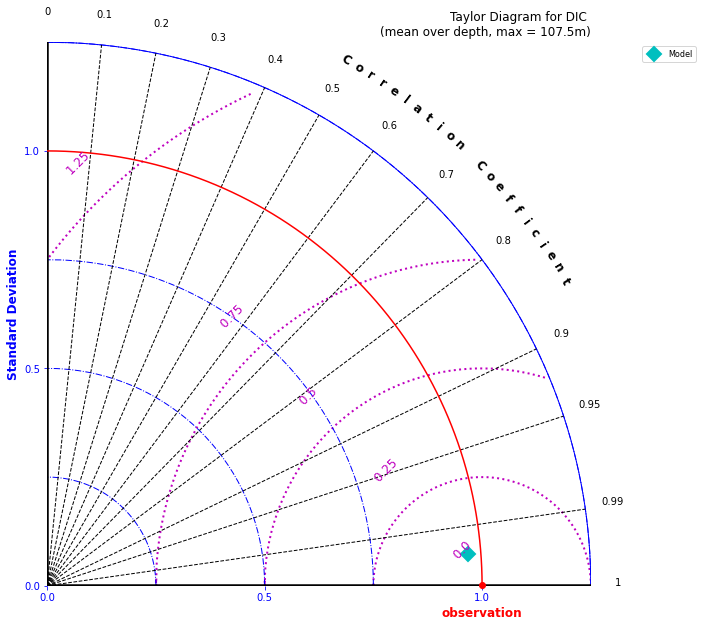

In [4]:
!jupyter nbconvert --to=python DIC_Glodap_Comparison_python3.ipynb
!jupyter nbconvert --to=python load_interp_GLODAP_python3.ipynb
from DIC_Glodap_Comparison_python3 import DICcomp

DICcomp(runid,resultpath,savepath,mesh,ncfileDIC,first_year_maps,last_year,mapproj=mapproj,savefig=savefig,
                 layerwise=layerwise,cmap = cmo.cm.tempo_r, cmap_extension = 'both')

[NbConvertApp] Converting notebook Alk_Glodap_Comparison_python3.ipynb to python
[NbConvertApp] Writing 16819 bytes to Alk_Glodap_Comparison_python3.py
***
Loading GLODAP file: /work/ollie/projects/MarESys/evaluation/GLODAPv2.2016b.TAlk.nc
***
***
Depth greater in FESOM (-6125.0) than in GLODAP (-5500.0)
Please consider choosing max depth level 43 with max depth at -5275.0!
***


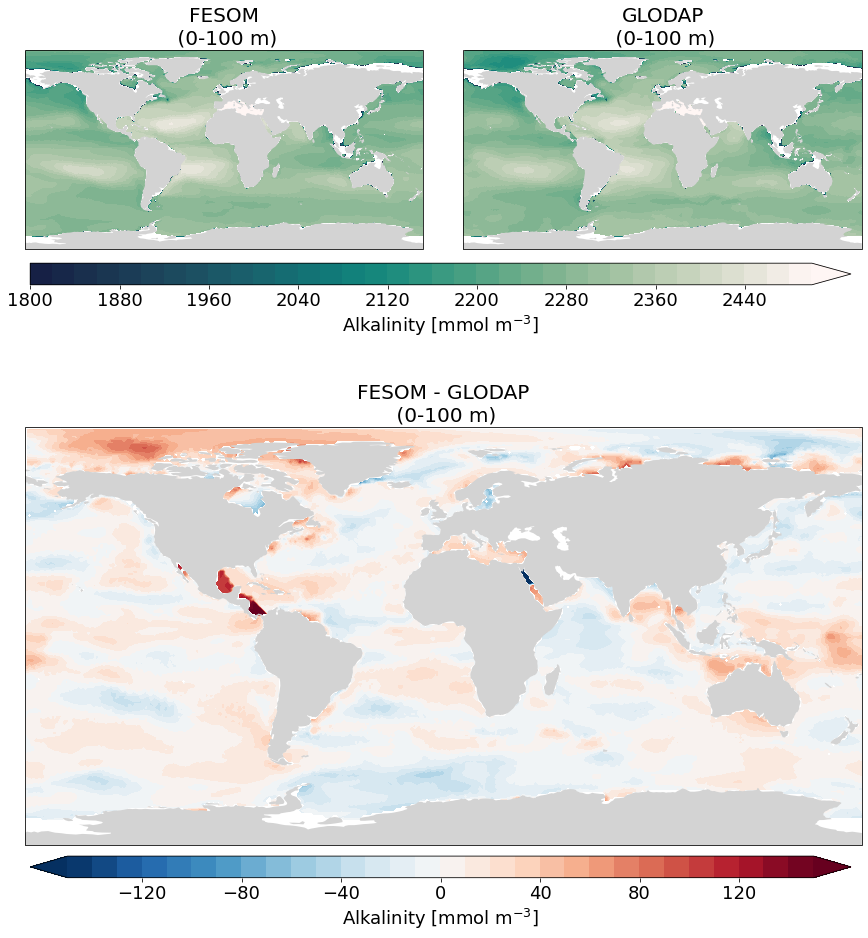


Original Taylor stats:
SDEV pred: 437.60153, ref: 438.69738
CRMS pred: 22.14002, ref: 0.00000
CORRCOEF: 0.99873

Normalized Taylor stats:
SDEV pred: 0.99750, ref: 1.00000
CRMS pred: 0.05047, ref: 0.00000
CORRCOEF: 0.99873


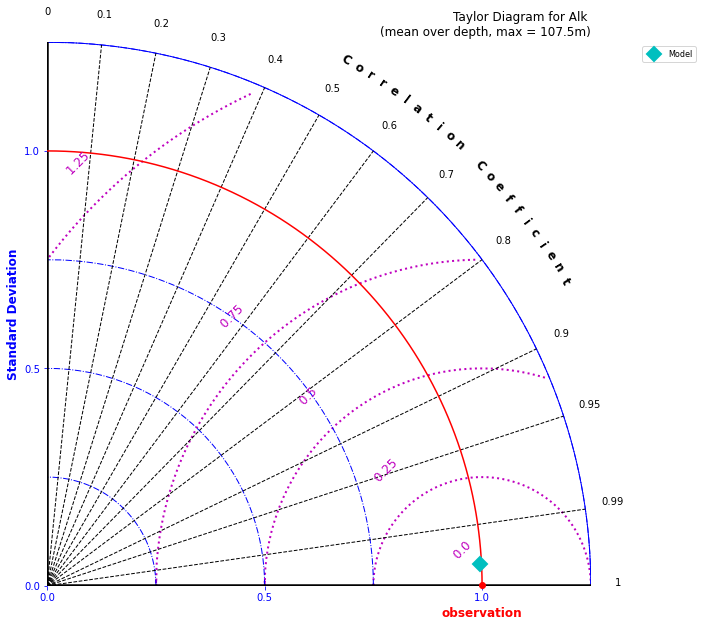

In [5]:
!jupyter nbconvert --to=python Alk_Glodap_Comparison_python3.ipynb
from Alk_Glodap_Comparison_python3 import Alkcomp

Alkcomp(runid,resultpath,savepath,mesh,ncfileAlk,first_year_maps,last_year,mapproj=mapproj,savefig=savefig,
                 layerwise=layerwise,cmap = cmo.cm.tempo_r)

[NbConvertApp] Converting notebook pCO2SOCAT_python3.ipynb to python
[NbConvertApp] Writing 11507 bytes to pCO2SOCAT_python3.py
[NbConvertApp] Converting notebook load_interp_SOCAT_python3.ipynb to python
[NbConvertApp] Writing 4630 bytes to load_interp_SOCAT_python3.py
***
Loading SOCAT file: /work/ollie/projects/MarESys/evaluation/SOCATv6_tracks_gridded_monthly.nc
***

***
*** no SOCAT data to be plotted before 1970
***
***
<function shape at 0x7f9e88072290>

Original Taylor stats:
SDEV pred: 39.70681, ref: 45.07269
CRMS pred: 43.34519, ref: 0.00000
CORRCOEF: 0.48315

Normalized Taylor stats:
SDEV pred: 0.88095, ref: 1.00000
CRMS pred: 0.96167, ref: 0.00000
CORRCOEF: 0.48315


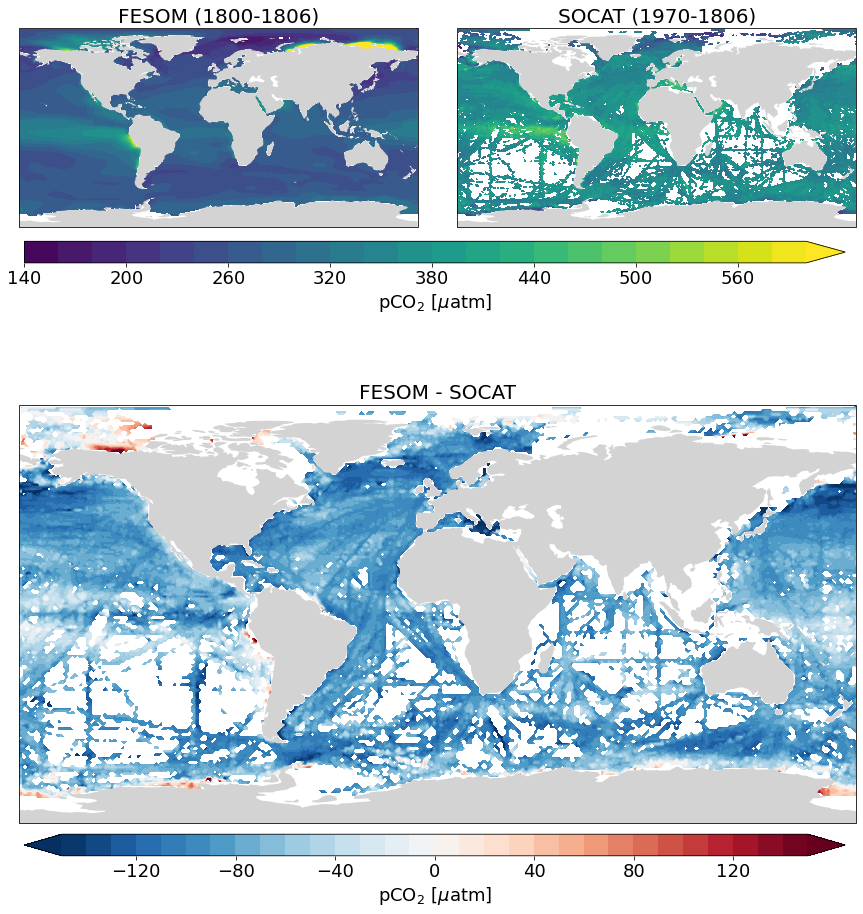

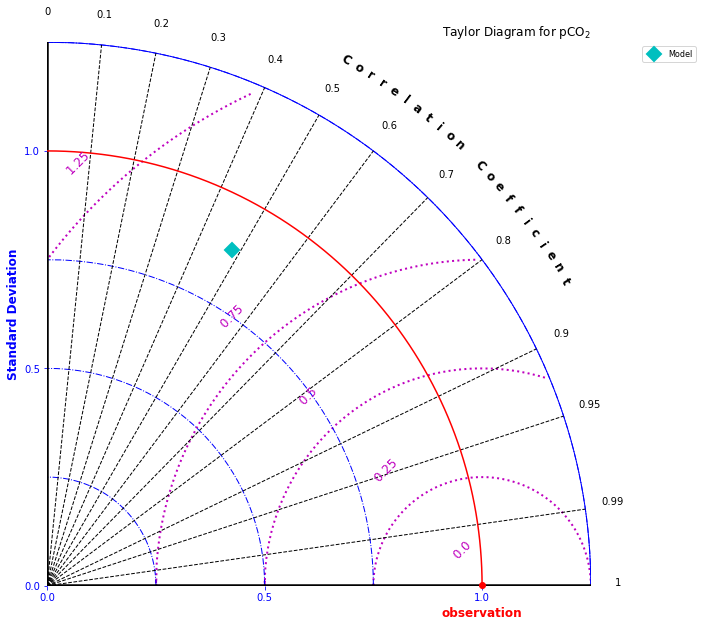

In [6]:
!jupyter nbconvert --to=python pCO2SOCAT_python3.ipynb
!jupyter nbconvert --to=python load_interp_SOCAT_python3.ipynb
from pCO2SOCAT_python3 import pCO2comp

pCO2comp(runid,resultpath,savepath,mesh,ncfilepCO2,first_year_maps,last_year,
                mapproj=mapproj,
                savefig=savefig)

[NbConvertApp] Converting notebook CO2fluxSpatialTakahashi_python3.ipynb to python
[NbConvertApp] Writing 12007 bytes to CO2fluxSpatialTakahashi_python3.py


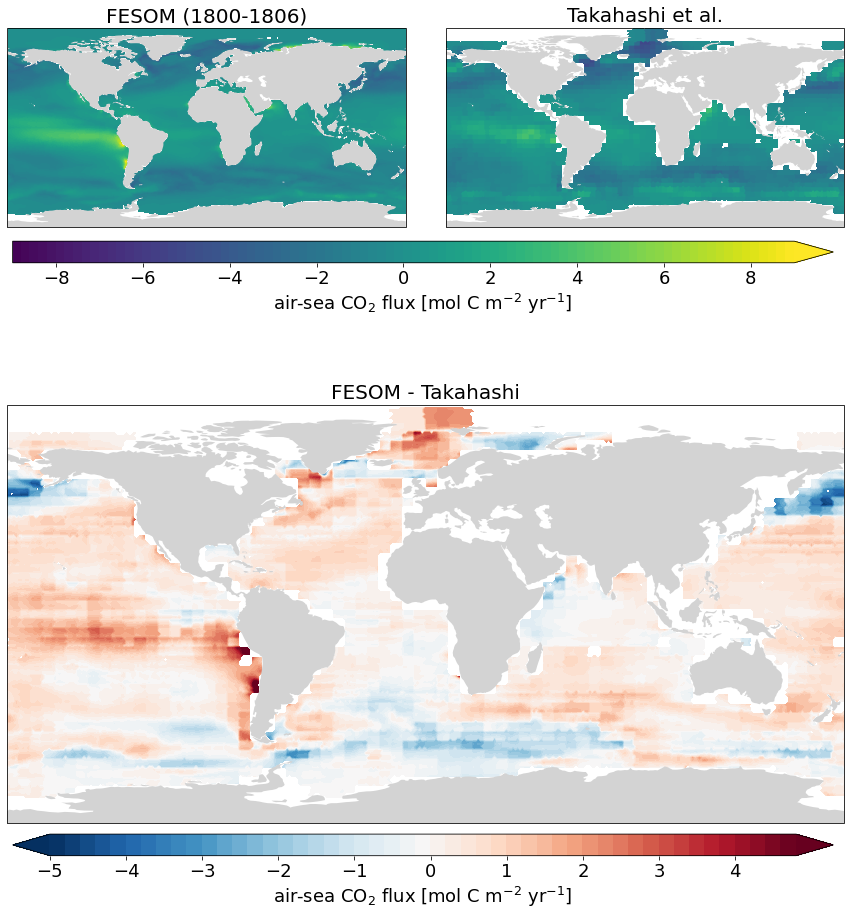


Original Taylor stats:
SDEV pred: 1.42782, ref: 1.37992
CRMS pred: 1.06969, ref: 0.00000
CORRCOEF: 0.71021

Normalized Taylor stats:
SDEV pred: 1.03471, ref: 1.00000
CRMS pred: 0.77518, ref: 0.00000
CORRCOEF: 0.71021
Adjust axis max to 1.5


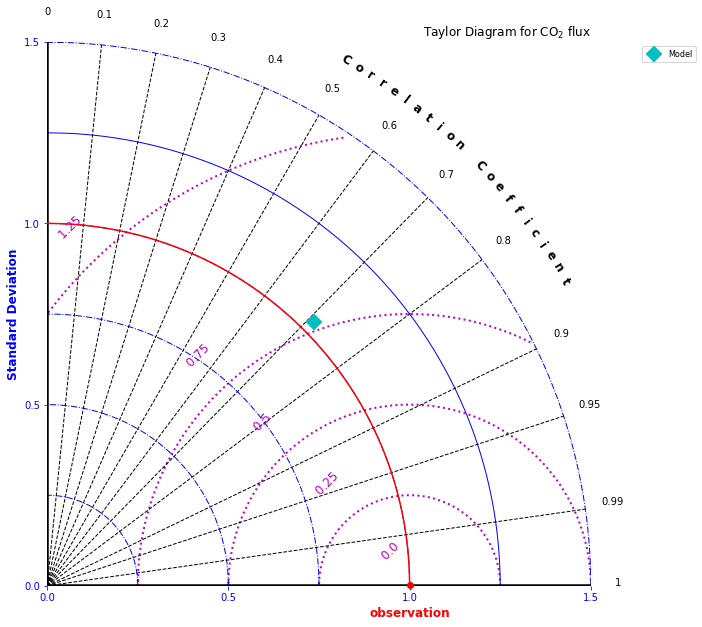

In [7]:
# there is a change of sign in the script, so that negative is CO2 uptake and positive is CO2 outgassing
!jupyter nbconvert --to=python CO2fluxSpatialTakahashi_python3.ipynb
from CO2fluxSpatialTakahashi_python3 import CO2f_Takahashi_comp

CO2f_Takahashi_comp(runid,resultpath,savepath,mesh,txtfileCO2flux,first_year_maps,last_year,
                           mapproj=mapproj,savefig=savefig)

## Time series

[NbConvertApp] Converting notebook CO2flux_timeseries_python3.ipynb to python
[NbConvertApp] Writing 16976 bytes to CO2flux_timeseries_python3.py


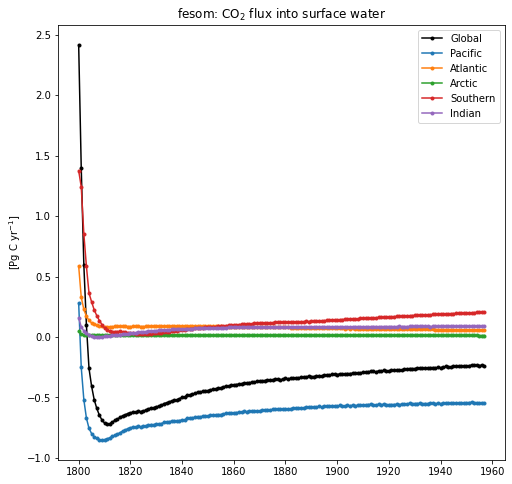

In [14]:
# positive is CO2 uptake, negative is outgassing
!jupyter nbconvert --to=python CO2flux_timeseries_python3.ipynb
from CO2flux_timeseries_python3 import CO2flux_timeseries

CO2flux_timeseries(runid,resultpath,savepath,mesh,first_year,last_year,savefig=savefig,regional='all')

# # The following is the depreciated version
# from CO2flux_TotalGlobal_python3 import CO2flux_TotalGlobal
# test = CO2flux_TotalGlobal(runid,resultpath,savepath,meshpath,first_year,last_year,savefig=savefig)

## Profiles

[NbConvertApp] Converting notebook Carbs_profiles_python3.ipynb to python
[NbConvertApp] Writing 14421 bytes to Carbs_profiles_python3.py
***
Loading GLODAP file: /work/ollie/projects/MarESys/evaluation/GLODAPv2.2016b.TCO2.nc
***
***
Depth greater in FESOM (-6125.0) than in GLODAP (-5500.0)
Please consider choosing max depth level 43 with max depth at -5275.0!
***
***
Loading GLODAP file: /work/ollie/projects/MarESys/evaluation/GLODAPv2.2016b.TAlk.nc
***
***
Depth greater in FESOM (-6125.0) than in GLODAP (-5500.0)
Please consider choosing max depth level 43 with max depth at -5275.0!
***


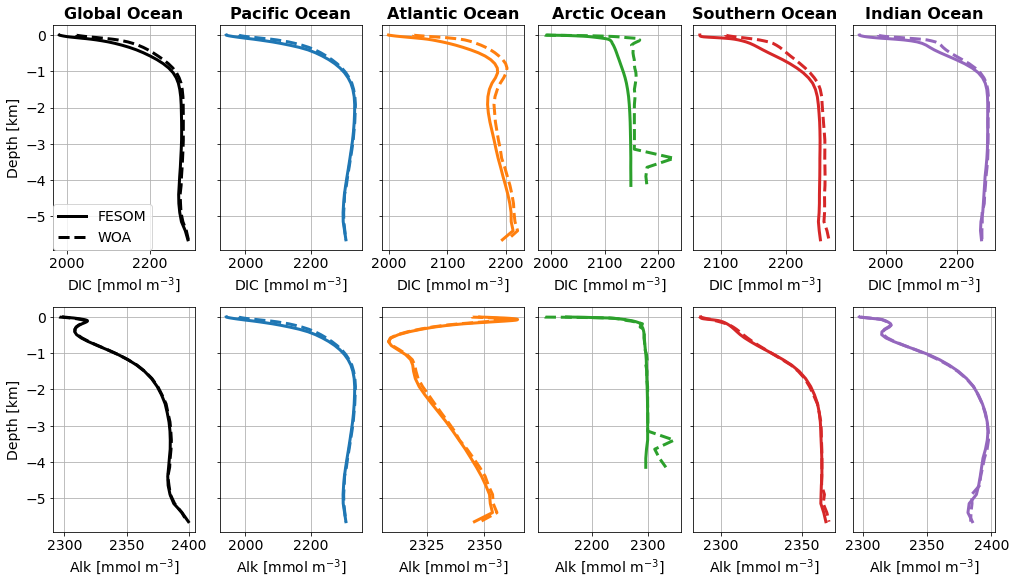

In [3]:
!jupyter nbconvert --to=python Carbs_profiles_python3.ipynb
from Carbs_profiles_python3 import Carbs_profile

Carbs_profile(runid,resultpath,savepath,mesh,ncfileAlk,ncfileDIC,first_year_maps,last_year,
                 savefig=savefig, regional=True)

# NPP, Export and Chlorophyll a

## Maps

### OCCCI Chl a

[NbConvertApp] Converting notebook Chlsurf_OCCCI_Comparison_python3.ipynb to python
[NbConvertApp] Writing 15265 bytes to Chlsurf_OCCCI_Comparison_python3.py


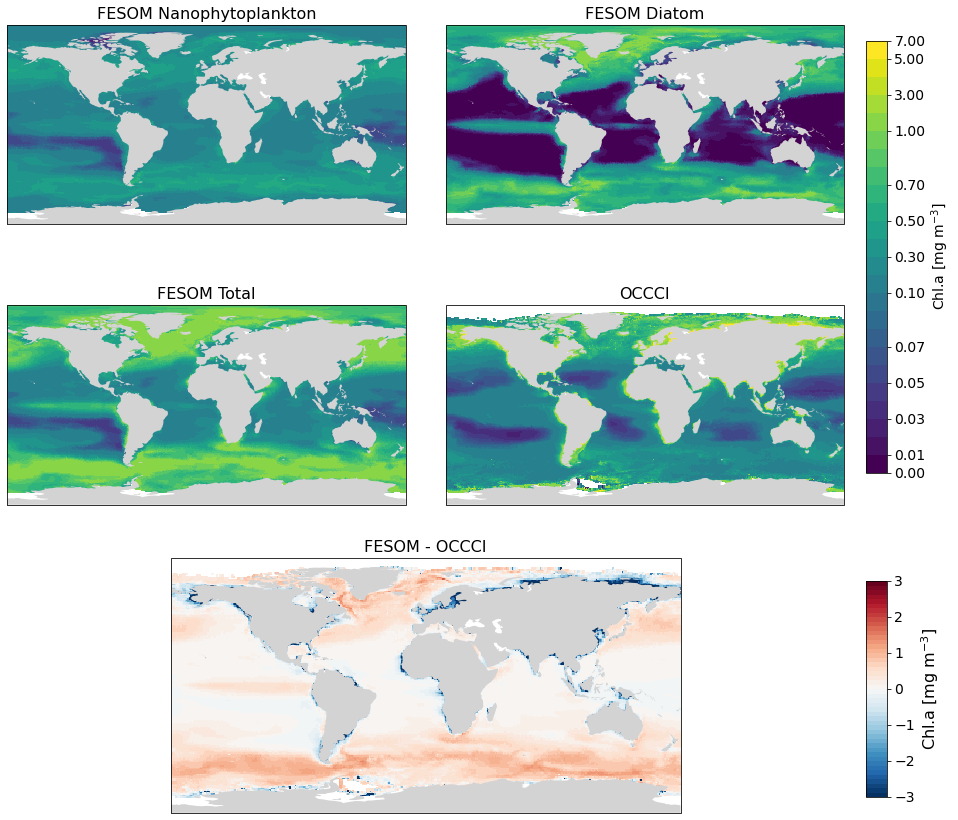


Statistics for log10 surface Chlorophyll

Original Taylor stats:
SDEV pred: 0.39424, ref: 0.44571
CRMS pred: 0.40250, ref: 0.00000
CORRCOEF: 0.54656

Normalized Taylor stats:
SDEV pred: 0.88453, ref: 1.00000
CRMS pred: 0.90305, ref: 0.00000
CORRCOEF: 0.54656


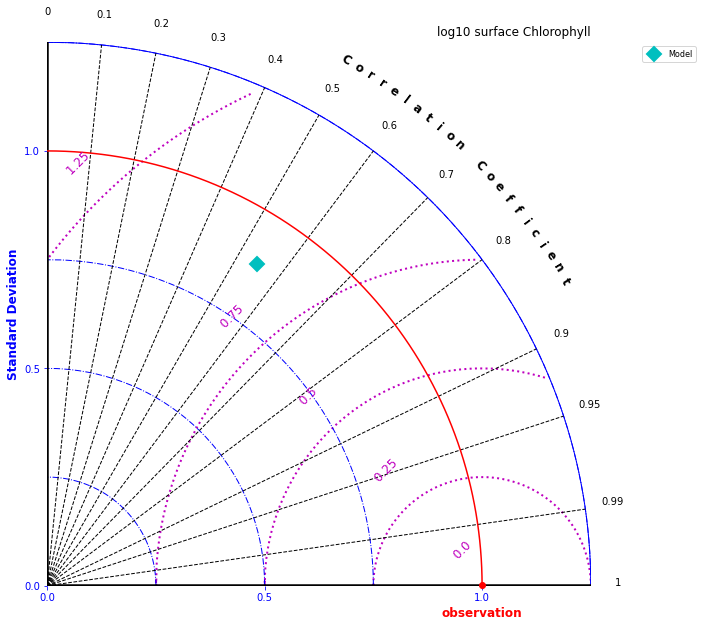

In [5]:
!jupyter nbconvert --to=python Chlsurf_OCCCI_Comparison_python3.ipynb
from Chlsurf_OCCCI_Comparison_python3 import Chlsurf_OCCCI_comp


# analyze only last 10 years, surface only
Chlsurf_OCCCI_comp(runid,resultpath,savepath,mesh,matfileChlsurf,
                          first_year_maps,last_year,
                          #first_year,last_year,
                          mapproj=mapproj,savefig=savefig)

### Johnson et al. (2013) -  Southern ocean Chl a

[NbConvertApp] Converting notebook Chlsurf_SO_Johnson2013_Comparison_python3.ipynb to python
[NbConvertApp] Writing 14926 bytes to Chlsurf_SO_Johnson2013_Comparison_python3.py


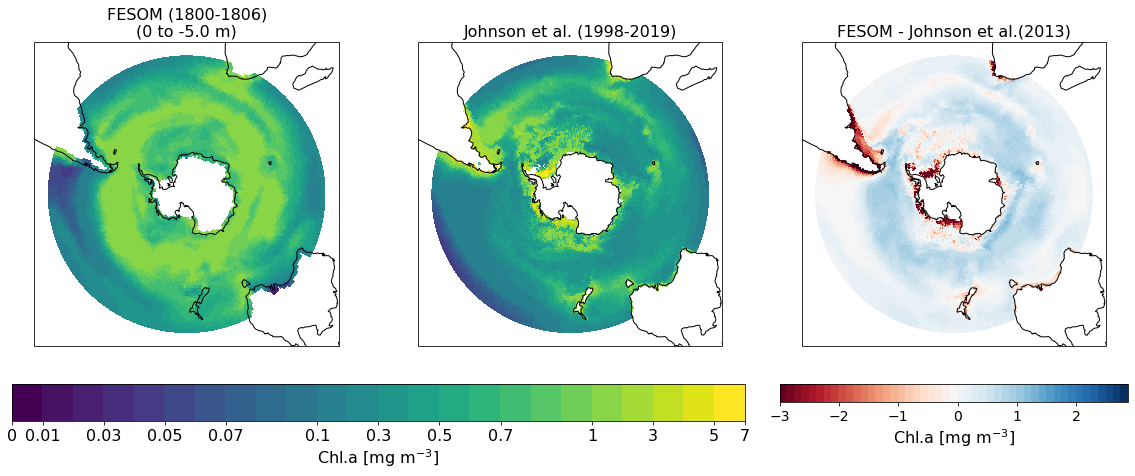


Statistics for log10 surface Chlorophyll

Original Taylor stats:
SDEV pred: 0.27367, ref: 0.33909
CRMS pred: 0.33252, ref: 0.00000
CORRCOEF: 0.42764

Normalized Taylor stats:
SDEV pred: 0.80709, ref: 1.00000
CRMS pred: 0.98063, ref: 0.00000
CORRCOEF: 0.42764


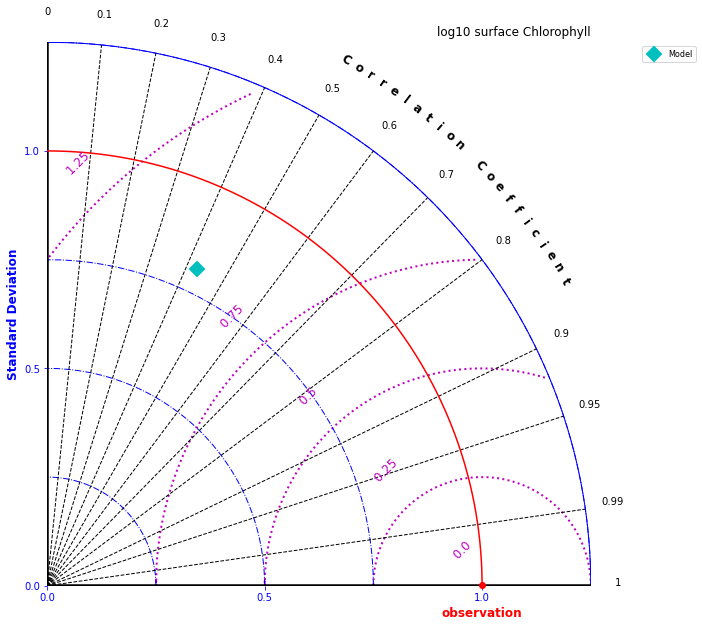

In [6]:
!jupyter nbconvert --to=python Chlsurf_SO_Johnson2013_Comparison_python3.ipynb
from Chlsurf_SO_Johnson2013_Comparison_python3 import Chlsurf_SO_comp

# analyze only last 10 years, surface only
Chlsurf_SO_comp(runid,resultpath,savepath,mesh,ncfileJohnson2013,
                          first_year_maps,last_year,
                          #first_year,last_year,
                          mapproj='sp',savefig=savefig)

### NPP (cpbm & vgpn)

[NbConvertApp] Converting notebook NPPsurf_OCNPP_Comparison_python3.ipynb to python
[NbConvertApp] Writing 12010 bytes to NPPsurf_OCNPP_Comparison_python3.py


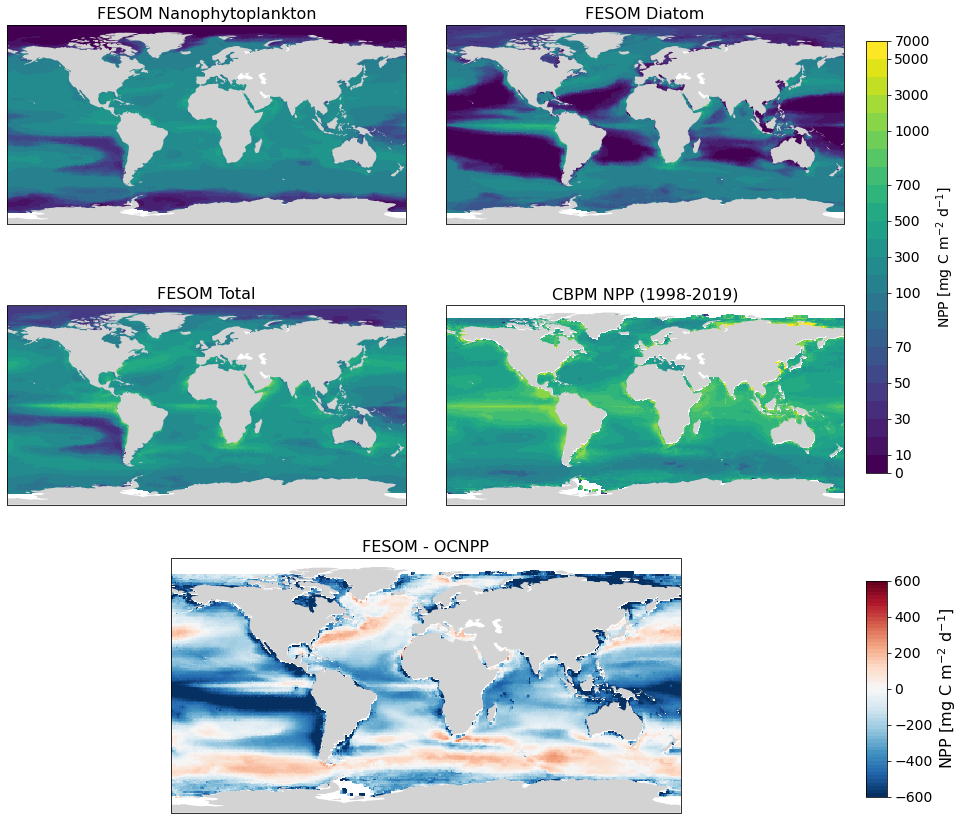


Statistics for log10 surface NPP

Original Taylor stats:
SDEV pred: 0.28387, ref: 0.24674
CRMS pred: 0.37367, ref: 0.00000
CORRCOEF: 0.01311

Normalized Taylor stats:
SDEV pred: 1.15049, ref: 1.00000
CRMS pred: 1.51441, ref: 0.00000
CORRCOEF: 0.01311
Adjust axis max to 1.5


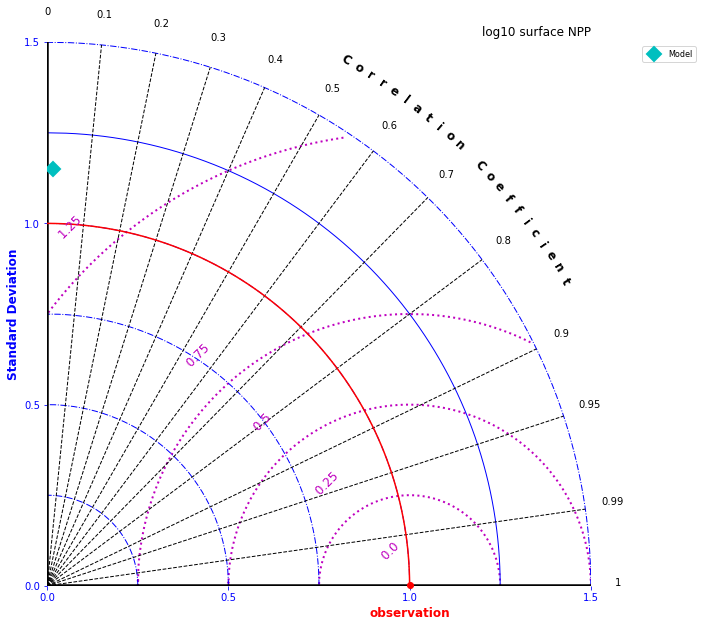

In [7]:
!jupyter nbconvert --to=python NPPsurf_OCNPP_Comparison_python3.ipynb
from NPPsurf_OCNPP_Comparison_python3 import NPPsurf_OCNPP_comp

# analyze only last 10 years
# WARNING: here FESOM NPP is integrated and compared to Ocean Color NPP (surface)
NPPsurf_OCNPP_comp(runid,resultpath,savepath,mesh,matfileNPPcpbm,
                          first_year_maps,last_year,
                          mapproj=mapproj,savefig=savefig)

[NbConvertApp] Converting notebook NPPsurf_OCNPP_Comparison_python3.ipynb to python
[NbConvertApp] Writing 12010 bytes to NPPsurf_OCNPP_Comparison_python3.py


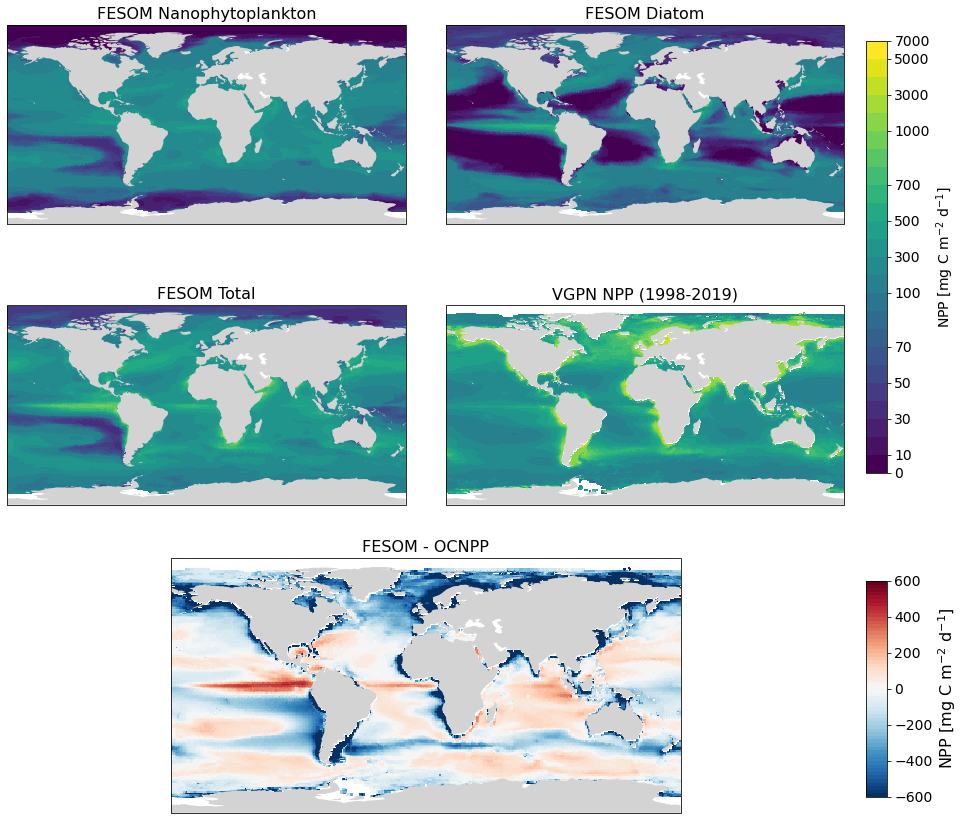


Statistics for log10 surface NPP

Original Taylor stats:
SDEV pred: 0.29515, ref: 0.27332
CRMS pred: 0.35406, ref: 0.00000
CORRCOEF: 0.22599

Normalized Taylor stats:
SDEV pred: 1.07988, ref: 1.00000
CRMS pred: 1.29540, ref: 0.00000
CORRCOEF: 0.22599
Adjust axis max to 1.5


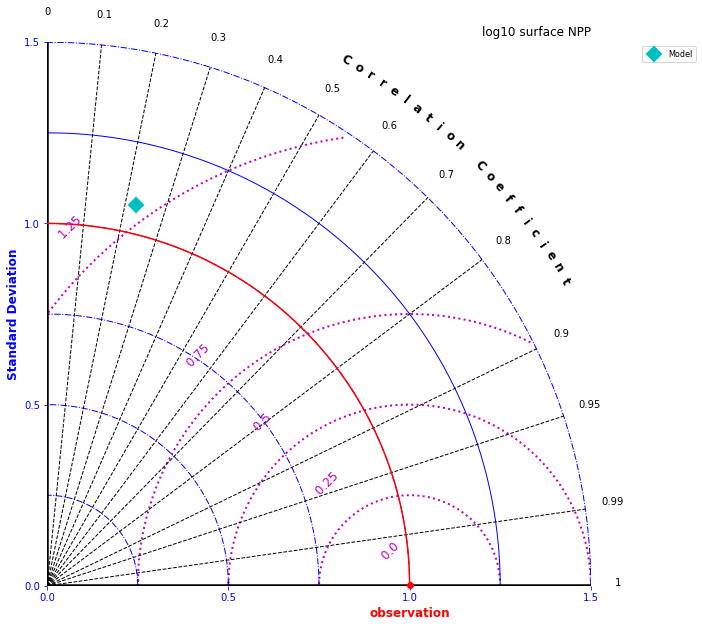

In [8]:
!jupyter nbconvert --to=python NPPsurf_OCNPP_Comparison_python3.ipynb
from NPPsurf_OCNPP_Comparison_python3 import NPPsurf_OCNPP_comp

# analyze only last 10 years
# WARNING: here FESOM NPP is integrated and compared to Ocean Color NPP (surface)

NPPsurf_OCNPP_comp(runid,resultpath,savepath,mesh,matfileNPPvgpn,
                          first_year_maps,last_year,
                          mapproj=mapproj,savefig=savefig)

## latitudinal distributions

[NbConvertApp] Converting notebook Chl_NPP_lat_comparison_python3.ipynb to python
[NbConvertApp] Writing 3498 bytes to Chl_NPP_lat_comparison_python3.py
[NbConvertApp] Converting notebook Chlsurf_OCCCI_Comparison_python3.ipynb to python
[NbConvertApp] Writing 15265 bytes to Chlsurf_OCCCI_Comparison_python3.py
[NbConvertApp] Converting notebook Chlsurf_SO_Johnson2013_Comparison_python3.ipynb to python
[NbConvertApp] Writing 14926 bytes to Chlsurf_SO_Johnson2013_Comparison_python3.py
[NbConvertApp] Converting notebook NPPsurf_OCNPP_Comparison_python3.ipynb to python
[NbConvertApp] Writing 12010 bytes to NPPsurf_OCNPP_Comparison_python3.py


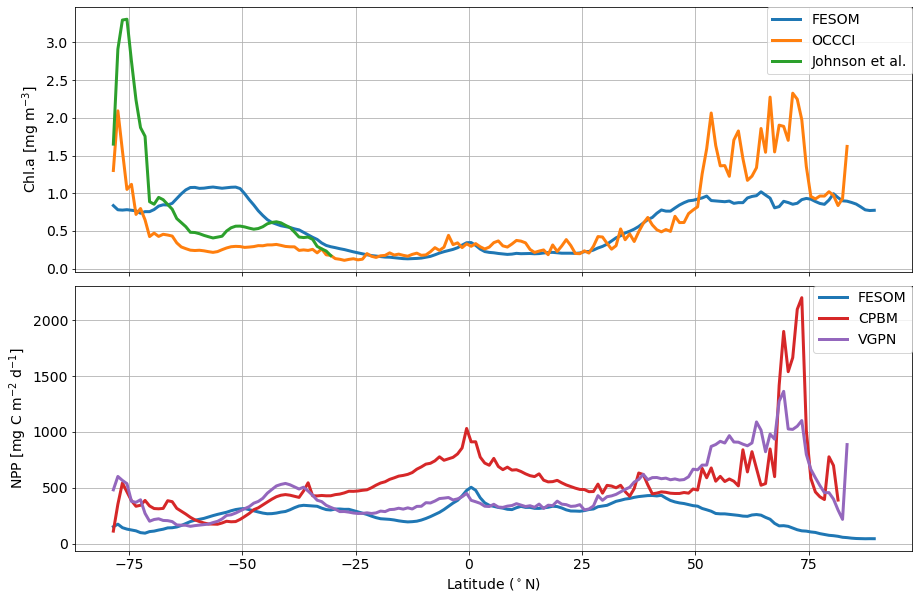

In [3]:
!jupyter nbconvert --to=python Chl_NPP_lat_comparison_python3.ipynb
!jupyter nbconvert --to=python Chlsurf_OCCCI_Comparison_python3.ipynb
!jupyter nbconvert --to=python Chlsurf_SO_Johnson2013_Comparison_python3.ipynb
!jupyter nbconvert --to=python NPPsurf_OCNPP_Comparison_python3.ipynb
from Chl_NPP_lat_comparison_python3 import Chl_NPP_lat_comp

Chl_NPP_lat_comp(runid,resultpath,savepath,mesh,
                            matfileChlsurf,ncfileJohnson2013,matfileNPPcpbm,matfileNPPvgpn,
                            first_year_maps,last_year, output=False, 
                            plotting=True, Taylor=True)

## Time series

[NbConvertApp] Converting notebook NPP_timeseries_python3.ipynb to python
[NbConvertApp] Writing 15566 bytes to NPP_timeseries_python3.py


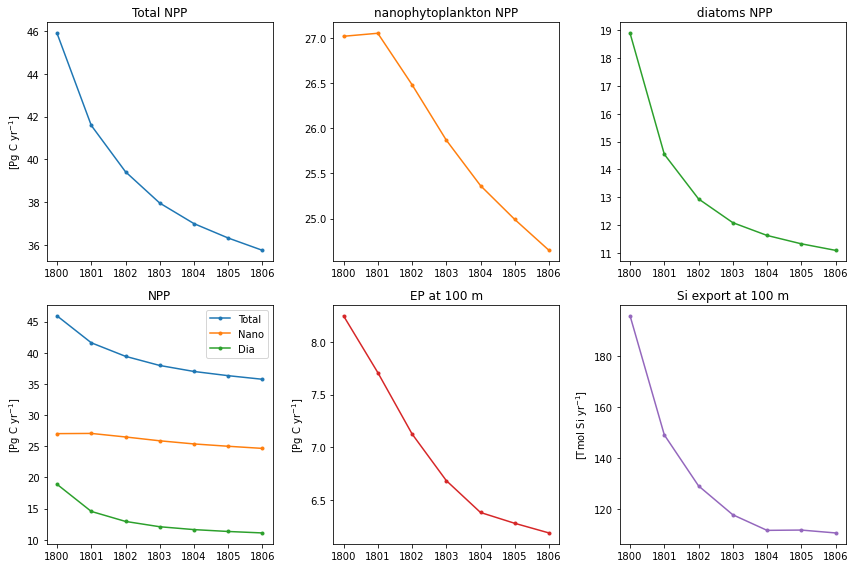

In [4]:
# time-series of NPP and export production

!jupyter nbconvert --to=python NPP_timeseries_python3.ipynb
from NPP_timeseries_python3 import NPP_timeseries

NPP_timeseries(runid,resultpath,savepath,mesh,first_year,last_year,savefig=savefig,mask="Global Ocean")
### export production --> detritus sinking out of 100 m depth

# # Below the depreciated version
# !jupyter nbconvert --to=python NPP_TotalGlobal_python3.ipynb
# from NPP_TotalGlobal_python3 import NPP_TotalGlobal
# test = NPP_TotalGlobal(runid,resultpath,savepath,meshpath,first_year,last_year,savefig=savefig) 

[NbConvertApp] Converting notebook NPP_timeseries_python3.ipynb to python
[NbConvertApp] Writing 15566 bytes to NPP_timeseries_python3.py


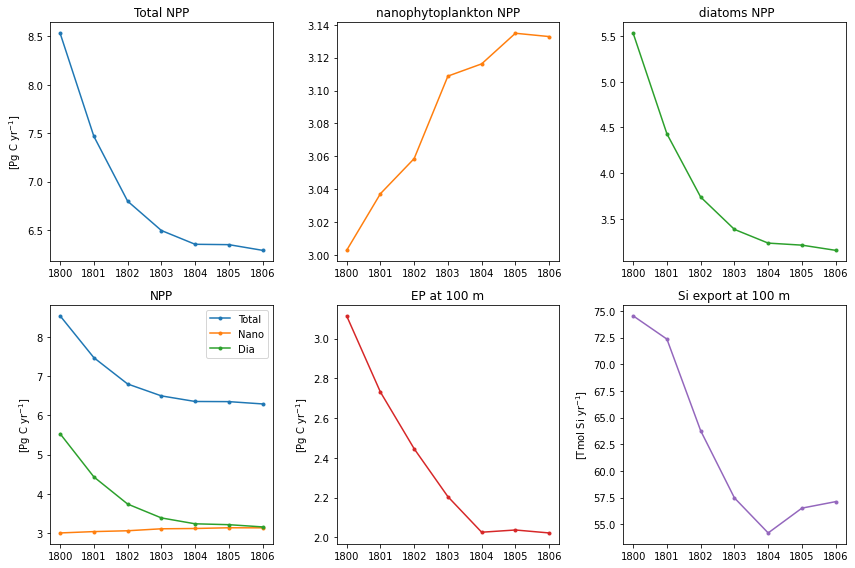

In [5]:
# Example for the Southern Ocean only
!jupyter nbconvert --to=python NPP_timeseries_python3.ipynb
from NPP_timeseries_python3 import NPP_timeseries
NPP_timeseries(runid,resultpath,savepath,mesh,first_year,last_year,savefig=savefig,mask="Southern_Ocean_Basin")

# # Depreciated version below
# !jupyter nbconvert --to=python NPP_TotalSouthernOcean_python3.ipynb
# from NPP_TotalSouthernOcean_python3 import NPP_TotalSO
# test = NPP_TotalSO(runid,resultpath,savepath,meshpath,first_year,last_year,savefig=savefig)

# Rivers

In [ ]:
from netCDF4 import Dataset

NCfesom = '/work/ollie/ogurses/input/mesh_fArc/RiverineInput.nc'
!ncdump -h $NCfesom

f	= Dataset(NCfesom,'r')
DIN = f.variables['DIN'][:]

fig = pf.plot(mesh, 30*24*3600*DIN[9,:], mapproj = mapproj, units='mmol m$^{-3}$ month$^{-1}$', 
              levels = np.arange(0,3,.2),
              cmap='viridis')

In [ ]:
NCfesom = resultpath+'DSi.fesom.1800.nc'
#!ncdump -h $NCfesom

# 12.01* data --> mmolC/m2/d to mg C/m2/d

units = 'DSi [mmol m$^{-3}$]'

f	= Dataset(NCfesom,'r')
DSi = f.variables['DSi'][:]
print(np.shape(DSi))
# NPP is already vertically integrated!

fig = pf.plot(mesh, DSi[0,:,0], mapproj = mapproj, units=units, 
              levels = np.arange(0,10.2,.2),
              cmap='viridis')

In [ ]:
NCfesom = resultpath+'DIN.fesom.1800.nc'
#!ncdump -h $NCfesom

# 12.01* data --> mmolC/m2/d to mg C/m2/d

units = 'DIN [mmol m$^{-3}$]'

f	= Dataset(NCfesom,'r')
DIN = f.variables['DIN'][:]
print(np.shape(DIN))
# NPP is already vertically integrated!

fig = pf.plot(mesh, DIN[0,:,0], mapproj = mapproj, units=units, 
              levels = np.arange(0,10.2,.2),
              cmap='viridis')

In [ ]:
# NCfesom1 = '/work/ollie/loziel/model_output/fesom2.1_recom/A_spinup_riv/DIN.fesom.1850.nc'
# NCfesom2 = '/work/ollie/ogurses/output_f2r2/spinup_1800_1850/A_spinup/DIN.fesom.1850.nc'
# #!ncdump -h $NCfesom

# # 12.01* data --> mmolC/m2/d to mg C/m2/d

# units = 'DIN [mmol m$^{-3}$]'

# f1	= Dataset(NCfesom1,'r')
# DIN1 = f1.variables['DIN'][:]
# f2	= Dataset(NCfesom2,'r')
# DIN2 = f2.variables['DIN'][:]
# DIN = DIN1 - DIN2
# print(np.shape(DIN))
# # NPP is already vertically integrated!

# fig = pf.plot(mesh, DIN[7,:,0], mapproj = mapproj, units=units, 
#               levels = np.arange(-4,4.2,.2),
#               cmap=cmo.cm.balance)

# Biology - MarEDAT Diatom C

In [ ]:
# Diatom carbon comparison with MarEDAT

!jupyter nbconvert --to=python DiaC_MarEDAT_python3.ipynb
from DiaC_MarEDAT_python3 import DiaC_MarEDAT_comp

maredat = DiaC_MarEDAT_comp(runid,resultpath,savepath,meshpath,ncfileMaredat,last_year-10,last_year,
        mapproj='pc',
        verbose = False,
        savefig=savefig)

# Biology - intracellular C, N, Si

In [ ]:
# Phytplankton carbon

NCfesom = resultpath + '/PhyC.fesom.'+str(last_year)+'.nc'
#!ncdump -h $NCfesom

label='Phytoplankton intracell. Carbon {0}-{1} at {2} m'.format(years_last10[0],years_last10[-1],depth)
units = 'intracellular C [mmol C m$^{-3}$]'
PhyC = pf.get_data(resultpath, "PhyC", years_last10, mesh, runid=runid, how="mean", compute=True, depth = depth)
fig = pf.plot(mesh, PhyC, mapproj = mapproj, units=units, titles=label)


In [ ]:
# Phytplankton nitrogen

NCfesom = resultpath + '/PhyN.fesom.'+str(last_year)+'.nc'
#!ncdump -h $NCfesom

label='Phytoplankton intracell. Nitrogen {0}-{1} at {2} m'.format(years_last10[0],years_last10[-1],depth)
units = 'intracellular N [mmol C m$^{-3}$]'
PhyN = pf.get_data(resultpath, "PhyN", years_last10, mesh, runid=runid, how="mean", compute=True, depth=depth)
fig = pf.plot(mesh, PhyN, mapproj = mapproj, units=units, titles=label)


In [ ]:
# Diatom carbon

NCfesom = resultpath + '/DiaC.fesom.'+str(last_year)+'.nc'
#!ncdump -h $NCfesom

label='Diatom intracell. Carbon {0}-{1} at {2} m'.format(years_last10[0],years_last10[-1],depth)
units = 'intracellular C [mmol C m$^{-3}$]'
DiaC = pf.get_data(resultpath, "DiaC", years_last10, mesh, runid=runid, how="mean", compute=True, depth=depth)
fig = pf.plot(mesh, DiaC, mapproj = mapproj, units=units, titles=label)


In [ ]:
# Diatom nitrogen

NCfesom = resultpath + '/DiaN.fesom.'+str(last_year)+'.nc'
#!ncdump -h $NCfesom

label='Diatom intracell. Nitrogen {0}-{1} at {2} m'.format(years_last10[0],years_last10[-1],depth)
units = 'intracellular N [mmol C m$^{-3}$]'
DiaN = pf.get_data(resultpath, "DiaN", years_last10, mesh, runid=runid, how="mean", compute=True, depth=depth)
fig = pf.plot(mesh, DiaN, mapproj = mapproj, units=units, titles=label)


In [ ]:
# Diatom silicate

#NCfesom = resultpath + '/DiaSi.fesom.'+str(last_year)+'.nc'
#!ncdump -h $NCfesom

label='Diatom intracell. Silicate {0}-{1} at {2} m'.format(years[0],years[1],depth)
units = 'intracellular Si [mmol m$^{-3}$]'
DiaSi = pf.get_data(resultpath, "DiaSi", years, mesh, runid=runid, how="mean", compute=True, depth=depth)

try:
    print('DiaSi \nmin {0} \nmax {1} \nmean {2} '.format(np.nanmin(DiaSi), np.nanmax(DiaSi), np.nanmean(DiaSi)))
    fig = pf.plot(mesh, DiaSi, 
                  mapproj = mapproj, 
                  units=units, titles=label)
except:
    print('*** Could not print DiaSi ***')

# extra - gross primary production

In [ ]:
# Diatom GPP

#NCfesom = resultpath + '/GPPd.fesom.'+str(last_year)+'.nc'
#!ncdump -h $NCfesom

# 12.01* data --> mg C/m2/d

label='Mean diatom GPP {0}-{1}'.format(years_last10[0],years_last10[-1])
units = 'GPP [mg C  m$^{-2}$ d$^{-1}$]'
GPPd = pf.get_data(resultpath, "GPPd", years_last10, mesh, runid=runid, how="mean", compute=True, silent=True)
GPPd = GPPd * 12.01

fig = pf.plot(mesh, GPPd, mapproj = mapproj, units=units, titles=label)


In [ ]:
# Nanophytoplankton GPP

#NCfesom = resultpath + '/GPPn.fesom.'+str(last_year)+'.nc'
#!ncdump -h $NCfesom

# 12.01* data --> mg C/m2/d

label='Mean nanophytoplankton GPP {0}-{1}'.format(years_last10[0],years_last10[-1])
units = 'GPP [mg C  m$^{-2}$ d$^{-1}$]'
GPPn = pf.get_data(resultpath, "GPPn", years_last10, mesh, runid=runid, how="mean", compute=True, silent=True)
GPPn = GPPn * 12.01

fig = pf.plot(mesh, GPPn, mapproj = mapproj, units=units, titles=label)


In [ ]:
# total GPP

label='Mean total GPP {0}-{1}'.format(years_last10[0],years_last10[-1])
units = 'total GPP [mg C  m$^{-2}$ d$^{-1}$]'

GPPtotal = GPPn + GPPd
fig = pf.plot(mesh, GPPtotal, mapproj = mapproj, units=units, titles=label)

# Save notebook as html

In [ ]:
%autosave 2

!jupyter nbconvert MASTER_Script_python3__A_riv.ipynb --output-dir=$htmlpath --output $htmlname --to html --no-input